In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

data = pd.read_csv("path", delimiter="\t", quoting=0, low_memory=False)

In [4]:
import pandas as pd

# Set paths to your dataframes
data = pd.read_csv("path", delimiter="\t", quoting=0, low_memory=False)
participant_data = pd.read_csv("path", delimiter="\t", quoting=0, low_memory=False)

# Load the dataframes
full_df = data
participant_df = participant_data

# Get column names
full_columns = set(full_df.columns)
participant_columns = set(participant_df.columns)

# Subtract participant columns to get eye-tracking feature names
eye_tracking_features = full_columns - participant_columns

# Optional: convert to sorted list
# eye_tracking_features = sorted(list(eye_tracking_features))

print("Eye-tracking feature names:")
print(eye_tracking_features)

Eye-tracking feature names:
{'Total_duration_of_whole_fixations', 'Time_to_first_Visit', 'Maximum_duration_of_whole_fixations', 'screenid', 'filename.et', 'set2', 'text.type', 'Total_duration_of_Visit', 'Number_of_whole_fixations', 'First-pass_duration', 'Duration_of_first_Visit', 'Recording', 'id.global.aoi.participant', 'First-pass_first_fixation_duration', 'Re-reading_duration', 'Selective_regression-path_duration', 'id.global.aoi', 'Duration_of_first_whole_fixation', 'Average_whole-fixation_eye_openness', 'Average_duration_of_fixations', 'AOI', 'text.version', 'Total_duration_of_fixations', 'Media_old', 'Number_of_Visits', 'textid', 'Time_to_first_fixation', 'Peak_velocity_of_exit_saccade', 'Maximum_duration_of_Visit', 'Average_pupil_diameter', 'Media', 'Word_index', 'Sentence_index', 'Minimum_duration_of_Visit', 'Number_of_fixations', 'set1', 'Average_whole-fixation_pupil_diameter', 'Average_eye_openness', 'Maximum_duration_of_fixations', 'Time_to_exit_saccade', 'Minimum_duration_

In [1]:
# Create a dictionary to hold the dataframes for each person
participants = data['Participant_unique'].unique()
# participants = sorted(participants)

participant_dfs = {}

# Loop through each participant and create a dataframe for them
for participant in participants:
    # Filter the data for the current participant
    filtered_data = data[data['Participant_unique'] == participant]

    # Store the filtered dataframe in the dictionary
    participant_dfs[participant] = filtered_data

NameError: name 'data' is not defined

In [ ]:
def replace_na_with_zero(df, column_name):
  """
  Replaces 'N/A', 'n/a', NaN, and None values in a DataFrame column with 0.

  Args:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column to modify.

  Returns:
    pd.DataFrame: The modified DataFrame.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return df #Return original dataframe.

  df[column_name] = df[column_name].replace(['N/A', 'n/a', np.nan, None, 'NA'], 0)
  return df

replaced = replace_na_with_zero(data, 'Re-reading_duration')

In [ ]:
# split the dataset by text type
text_types = data['text.type'].unique()
text_types = sorted(text_types)

# Create a dictionary to hold the dataframes for each text type
text_type_dfs = {}

# Loop through each text type and create a dataframe for it
for text_type in text_types:
    # Filter the data for the current text type
    filtered_data = data[data['text.type'] == text_type]

    # Store the filtered dataframe in the dictionary
    text_type_dfs[text_type] = filtered_data

# Create a dictionary to hold the dataframes for each person
participants = data['Participant_unique'].unique()
# participants = sorted(participants)

participant_dfs = {}

# Loop through each participant and create a dataframe for them
for participant in participants:
    # Filter the data for the current participant
    filtered_data = data[data['Participant_unique'] == participant]

    # Store the filtered dataframe in the dictionary
    participant_dfs[participant] = filtered_data


# Create a dictionary to hold the dataframes for each text
text_dfs = {}

# Loop through each text and create a dataframe for it
texts = data['Media'].unique()
texts = sorted(texts)

for text in texts:
    # Filter the data for the current text
    filtered_data = data[data['Media'] == text]

    # Store the filtered dataframe in the dictionary
    text_dfs[text] = filtered_data

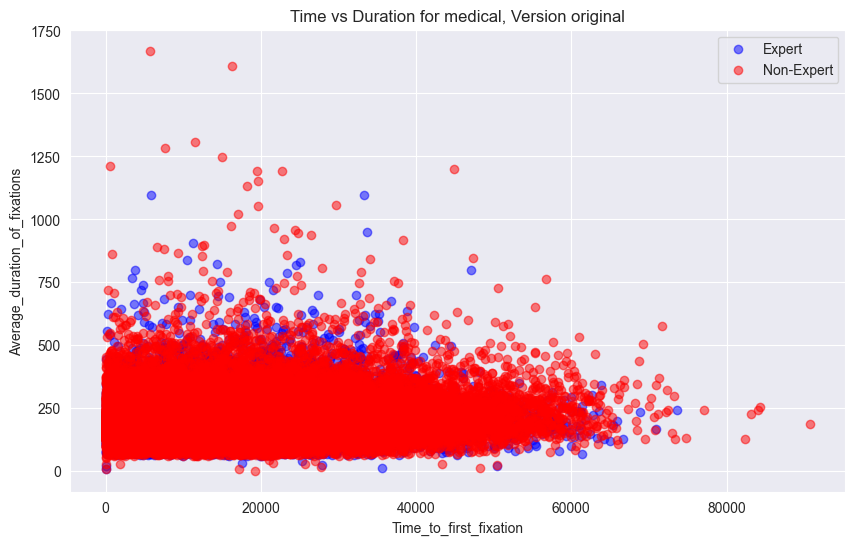

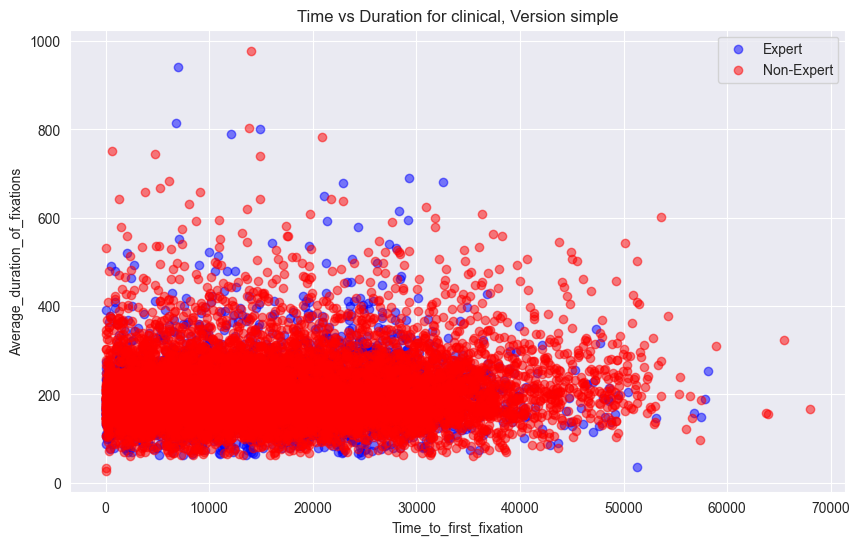

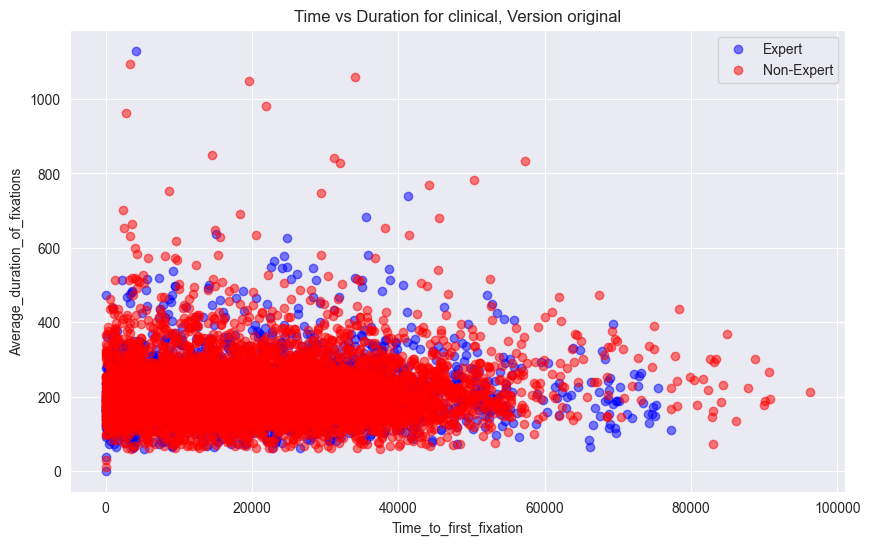

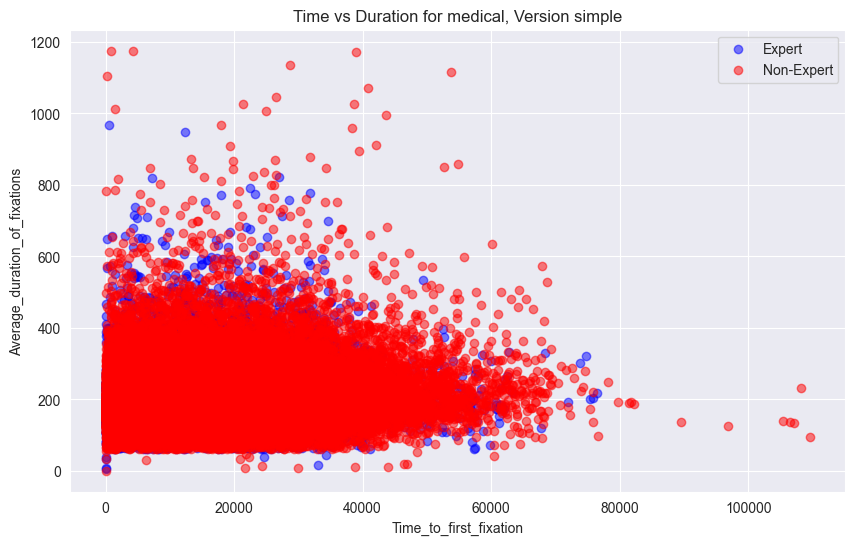

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def create_text_type_version_dfs(data):
    """
    Creates a dictionary of DataFrames, where keys are tuples of (text.type, text.version).

    Args:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary of DataFrames.
    """

    text_type_version_dfs = {}
    text_type_versions = data[['text.type', 'text.version']].drop_duplicates()

    for index, row in text_type_versions.iterrows():
        text_type = row['text.type']
        text_version = row['text.version']
        filtered_data = data[(data['text.type'] == text_type) & (data['text.version'] == text_version)]
        text_type_version_dfs[(text_type, text_version)] = filtered_data

    return text_type_version_dfs

def plot_scatter_by_expertise(df, x_column, y_column, title):
    """
    Plots a scatter plot differentiating experts and non-experts.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column for the x-axis.
        y_column (str): The name of the column for the y-axis.
        title (str): The title of the plot.
    """

    plt.figure(figsize=(10, 6))

    experts = df[df['is.expert'] == 'expert']
    non_experts = df[df['is.expert'] == 'non-expert']

    plt.scatter(experts[x_column], experts[y_column], alpha=0.5, label='Expert', color='blue')
    plt.scatter(non_experts[x_column], non_experts[y_column], alpha=0.5, label='Non-Expert', color='red')

    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.legend()
    plt.show()


text_type_version_dfs = create_text_type_version_dfs(data)

# Example usage for text types and versions:
for (text_type, text_version), df in text_type_version_dfs.items():
    plot_scatter_by_expertise(df, 'Time_to_first_fixation', 'Average_duration_of_fixations', f'Time vs Duration for {text_type}, Version {text_version}')

In [35]:
def plot_scatter_by_columns(text_type_version_dfs, unique_columns):
    """
    Plots scatter plots for all unique pairs of columns in DataFrames grouped by text type and version,
    with print statements for column tracking.

    Args:
        text_type_version_dfs (dict): A dictionary where keys are tuples (text_type, text_version) and values are DataFrames.
        unique_columns (list): A list of column names to generate pairs from.
    """
    print("Generating scatter plots for column pairs:")
    print("---------------------------------------")

    for i in range(len(unique_columns)):
        for j in range(i + 1, len(unique_columns)):
            col1 = unique_columns[i]
            col2 = unique_columns[j]

            print(f"Plotting: {col1} vs {col2}")

            for (text_type, text_version), df in text_type_version_dfs.items():
                plot_scatter_by_expertise(df, col1, col2, f'{col1} vs {col2} for {text_type}, Version {text_version}')
            print("---------------------------------------") # seperates each pair of plots

In [ ]:
participant_dfs['Participant1-1_B']['Time_to_first_fixation']

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_expertise_distribution(participant_dfs):
    """
    Calculates and plots the distribution of expert vs. non-expert participants.

    Args:
        participant_dfs (dict): A dictionary where keys are participant IDs
                                and values are pandas DataFrames. Each DataFrame
                                must contain an 'is.expert' column indicating
                                the expertise status (e.g., True/False, 1/0).
    """
    expertise_data = []
    processed_participants = set() # Keep track of participants already processed

    for participant_id, df in participant_dfs.items():
        if participant_id in processed_participants:
            continue # Skip if already counted

        if df is not None and not df.empty and 'is.expert' in df.columns:
            # Get the expertise status
            # Taking the first value is sufficient
            try:
                expertise = df['is.expert'].iloc[0]
                expertise_data.append(expertise)
                processed_participants.add(participant_id)
            except IndexError:
                 print(f"Warning: DataFrame for {participant_id} seems empty despite check, skipping.")
            except KeyError:
                 # This case should be caught by 'is.expert' in df.columns, but added for safety
                 print(f"Warning: Column 'is.expert' disappeared unexpectedly for {participant_id}, skipping.")

        elif 'is.expert' not in df.columns:
            print(f"Warning: Column 'is.expert' not found for participant {participant_id}. Skipping this participant.")
        elif df is None or df.empty:
             print(f"Warning: DataFrame for participant {participant_id} is None or empty. Skipping this participant.")


    if not expertise_data:
        print("No expertise data found to plot.")
        return

    # Create a Series for easy counting and mapping
    expertise_series = pd.Series(expertise_data)

    # Map boolean/numeric values to readable labels
    expertise_labels = expertise_series.map({True: 'Expert', False: 'Non-Expert', 1: 'Expert', 0: 'Non-Expert'})
    # If the mapping doesn't cover all values, keep the original value as label
    expertise_labels = expertise_labels.fillna(expertise_series.astype(str))


    # Count the occurrences of each category
    expertise_counts = expertise_labels.value_counts()

    # --- Plotting ---
    plt.figure(figsize=(8, 6))
    # Use seaborn's barplot for consistency, or plt.bar
    # sns.barplot(x=expertise_counts.index, y=expertise_counts.values, palette='Set2')
    # Or using Matplotlib directly:
    bars = plt.bar(expertise_counts.index, expertise_counts.values, color=sns.color_palette('Set2'))

    # Add counts on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # Add text labels

    plt.title('Distribution of Participants by Expertise')
    plt.xlabel('Expertise Level')
    plt.ylabel('Number of Participants')
    plt.ylim(0, expertise_counts.max() * 1.1) # Add some space above the tallest bar
    plt.xticks(rotation=0) # Keep labels horizontal if few categories
    plt.tight_layout()
    plt.show()

    print("\nParticipant Counts:")
    print(expertise_counts)

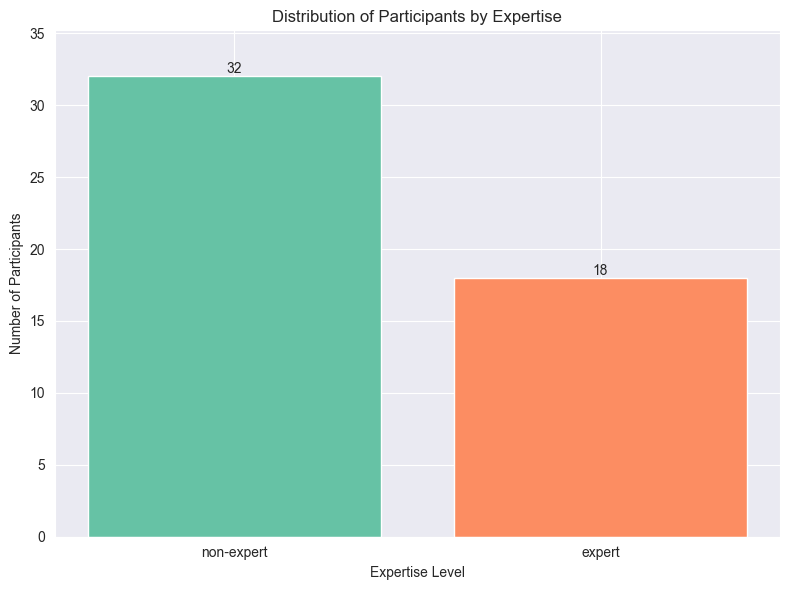


Participant Counts:
non-expert    32
expert        18
Name: count, dtype: int64


In [11]:
plot_expertise_distribution(participant_dfs)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_education_distribution(participant_dfs, target_column):
    """
    Calculates and plots the distribution of participant educational backgrounds.

    Args:
        participant_dfs (dict): A dictionary where keys are participant IDs
                                and values are pandas DataFrames. Each DataFrame
                                must contain an 'educational_background' column
                                indicating the participant's background (e.g., 'Bachelor', 'PhD').
    """
    education_data = []
    processed_participants = set() # Keep track of participants already processed

    for participant_id, df in participant_dfs.items():
        if participant_id in processed_participants:
            continue # Skip if already counted

        if df is not None and not df.empty and target_column in df.columns:
            # Get the educational background
            # Taking the first value is sufficient
            try:
                background = df[target_column].iloc[0]
                # Handle potential NaN or None values if necessary
                if pd.isna(background):
                    background = 'Unknown/Not Specified' # Assign a specific category
                education_data.append(background)
                processed_participants.add(participant_id)
            except IndexError:
                 print(f"Warning: DataFrame for {participant_id} seems empty despite check, skipping.")
            except KeyError:
                 # This case should be caught by 'target_column' in df.columns, but added for safety
                 print(f"Warning: Column '{target_column}' disappeared unexpectedly for {participant_id}, skipping.")

        elif target_column not in df.columns:
            print(f"Warning: Column '{target_column}' not found for participant {participant_id}. Skipping this participant.")
        elif df is None or df.empty:
             print(f"Warning: DataFrame for participant {participant_id} is None or empty. Skipping this participant.")


    if not education_data:
        print(f"No data found for '{target_column}' to plot.")
        return

    # Create a Series for easy counting
    education_series = pd.Series(education_data)

    # Count the occurrences of each category
    education_counts = education_series.value_counts()

    # --- Plotting ---
    num_categories = len(education_counts)
    fig_height = 6 + max(0, num_categories - 5) * 0.5
    plt.figure(figsize=(max(8, num_categories * 0.8), fig_height))

    sns.barplot(x=education_counts.index,
                y=education_counts.values,
                hue=education_counts.index, # Assign x to hue
                palette='viridis',
                legend=False) # Disable the legend


    # Add counts on top of bars (adjust logic slightly if using plt.bar directly)
    ax = plt.gca() # Get current axes
    for i, count in enumerate(education_counts.values):
         ax.text(i, count + education_counts.max()*0.01 , int(count), ha='center', va='bottom')


    plt.title('Distribution of Participants by ' + target_column)
    plt.xlabel(target_column)
    plt.ylabel('Number of Participants')
    plt.ylim(0, education_counts.max() * 1.15) # Add some space above the tallest bar

    # Rotate labels if there are many categories or long names
    if num_categories > 5 or any(len(str(label)) > 10 for label in education_counts.index):
        plt.xticks(rotation=45, ha='right')
    else:
         plt.xticks(rotation=0)

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    print("\nParticipant Counts by " + target_column + ":")
    print(education_counts)

--- Plot 1: Grouped Bars (Defaults) ---
Processing data based on 'educational_background' and 'is.expert'...


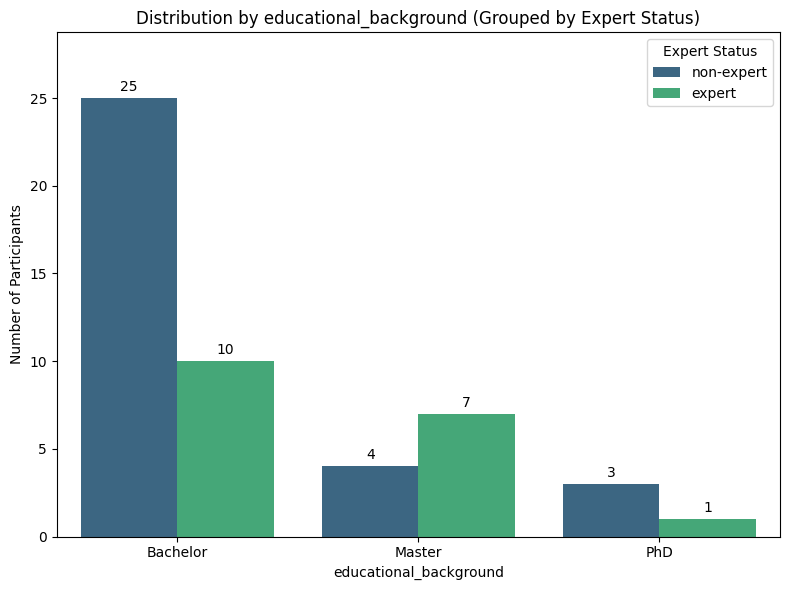


Participant Counts by educational_background and Expert Status:
expert_status           non-expert  expert
educational_background                    
Bachelor                        25      10
Master                           4       7
PhD                              3       1


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.style.use("default")

def plot_education_distribution_detailed(
    participant_dfs,
    target_column,
    expert_column='is.expert',
    renaming_map=None,
    plot_type='grouped', # 'grouped' or 'stacked'
    nan_expert_value='Unknown', # How to treat missing or unexpected expert status
    expert_true_label='expert',   # Default label for "expert" input (can be overridden for plot)
    expert_false_label='non-expert' # Default label for "non-expert" input (can be overridden for plot)
):
    """
    Calculates and plots the distribution of participant backgrounds,
    differentiating between experts and non-experts based on string values
    in the expert_column and allowing label renaming.

    Args:
        participant_dfs (dict): A dictionary where keys are participant IDs
                                and values are pandas DataFrames. Each DataFrame
                                must contain the target_column and expert_column.
        target_column (str): The column name for the categorical background
                             (e.g., 'educational_background').
        expert_column (str): The column name indicating expert status.
                             Expected to contain strings like "expert", "non-expert",
                             or potentially NaN/other values.
        renaming_map (dict, optional): A dictionary to rename labels in the
                                       target_column. Keys are original labels,
                                       values are new labels. Defaults to None (no renaming).
        plot_type (str): Type of bar chart: 'grouped' (default) or 'stacked'.
        nan_expert_value (str): Label to use if expert_column value is NaN or
                                not recognized ('expert'/'non-expert'). Defaults to 'Unknown'.
        expert_true_label (str): Label to use in the plot/output corresponding to the
                                 input string "expert". Defaults to 'expert'.
        expert_false_label (str): Label to use in the plot/output corresponding to the
                                  input string "non-expert". Defaults to 'non-expert'.
    """
    if renaming_map is None:
        renaming_map = {} # Initialize empty dict if None

    participant_data = []
    processed_participants = set() # Keep track of participants already processed

    print(f"Processing data based on '{target_column}' and '{expert_column}'...")

    for participant_id, df in participant_dfs.items():
        if participant_id in processed_participants:
            continue

        # Basic checks
        if df is None or df.empty:
            print(f"Warning: DataFrame for participant {participant_id} is None or empty. Skipping.")
            continue
        if target_column not in df.columns:
            print(f"Warning: Column '{target_column}' not found for participant {participant_id}. Skipping.")
            continue
        if expert_column not in df.columns:
            print(f"Warning: Column '{expert_column}' not found for participant {participant_id}. Skipping.")
            continue

        try:
            # --- Get Background ---
            raw_background = df[target_column].iloc[0]
            if pd.isna(raw_background):
                raw_background = 'Unknown/Not Specified'
            background_label = renaming_map.get(raw_background, raw_background)

            # --- Get Expert Status ---
            expert_status_raw = df[expert_column].iloc[0]

            # Map expert status strings to consistent labels for plotting/output
            # Use .strip().lower() for robustness against whitespace/case variations
            if pd.isna(expert_status_raw):
                expert_label = nan_expert_value
            elif str(expert_status_raw).strip().lower() == 'expert':
                 # Use the parameter, allowing user to rename "expert" for the plot if desired
                expert_label = expert_true_label
            elif str(expert_status_raw).strip().lower() == 'non-expert':
                 # Use the parameter, allowing user to rename "non-expert" for the plot if desired
                expert_label = expert_false_label
            else:
                # Handle unexpected values
                print(f"Warning: Participant {participant_id} has unexpected value "
                      f"'{expert_status_raw}' in '{expert_column}'. Treating as '{nan_expert_value}'.")
                expert_label = nan_expert_value

            participant_data.append({
                'id': participant_id,
                target_column: background_label,
                'expert_status': expert_label
            })
            processed_participants.add(participant_id)

        except IndexError:
            print(f"Warning: DataFrame for {participant_id} became empty unexpectedly. Skipping.")
        except Exception as e:
            print(f"Error processing participant {participant_id}: {e}. Skipping.")


    if not participant_data:
        print(f"No valid data found for '{target_column}' and '{expert_column}' to plot.")
        return

    plot_df = pd.DataFrame(participant_data)

    # --- Plotting ---
    num_categories = plot_df[target_column].nunique()
    unique_expert_labels = plot_df['expert_status'].unique()
    num_expert_cats = len(unique_expert_labels)

    # Adjust figure size dynamically
    base_width = 8
    extra_width_per_cat = 1.0 if plot_type == 'grouped' else 0.8
    fig_width = max(base_width, num_categories * num_expert_cats * extra_width_per_cat / 2)
    fig_height = 6 + max(0, num_categories - 5) * 0.5

    plt.figure(figsize=(fig_width, fig_height))

    # Define the order for expert status using the potentially re-labeled values
    # This ensures 'non-expert' comes before 'expert' if both are present
    expert_order = []
    if expert_false_label in unique_expert_labels:
        expert_order.append(expert_false_label)
    if expert_true_label in unique_expert_labels:
        expert_order.append(expert_true_label)
    if nan_expert_value in unique_expert_labels and nan_expert_value not in expert_order:
         expert_order.append(nan_expert_value)
    # Add any other unexpected labels that might have been mapped to 'expert_status'
    for label in unique_expert_labels:
        if label not in expert_order:
            expert_order.append(label)


    # Calculate counts for printing later
    counts_df = plot_df.groupby([target_column, 'expert_status']).size().unstack(fill_value=0)
    # Reindex columns to ensure consistent order based on expert_order
    counts_df = counts_df.reindex(columns=expert_order, fill_value=0)

    # --- Plotting ---
    category_order = sorted(plot_df[target_column].unique()) # Sort background categories

    if plot_type == 'grouped':
        ax = sns.countplot(
            data=plot_df,
            x=target_column,
            hue='expert_status',
            palette='viridis',
            order=category_order,
            hue_order=expert_order # Use the defined order for hues
        )
        plt.title(f'Distribution by {target_column} (Grouped by Expert Status)')
        for container in ax.containers:
             # Filter out zero counts before labeling
            labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
            ax.bar_label(container, labels=labels, label_type='edge', padding=3)

    elif plot_type == 'stacked':
         # Use pandas plotting for stacked bars based on the counts_df
         counts_df[expert_order].plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis', width=0.8, order=category_order)
         ax = plt.gca()
         plt.title(f'Distribution by {target_column} (Stacked by Expert Status)')
         for c in ax.containers:
              labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
              ax.bar_label(c, labels=labels, label_type='center', fmt='%d', color='white', fontweight='bold')

    else:
         print(f"Error: Invalid plot_type '{plot_type}'. Choose 'grouped' or 'stacked'.")
         return


    plt.xlabel(target_column)
    plt.ylabel('Number of Participants')

    # Adjust y-limit
    if plot_type == 'stacked':
         max_height = counts_df.sum(axis=1).max()
    else: # grouped
         # Calculate max height properly even with multiple groups
         max_height = counts_df.max().max() if not counts_df.empty else 1 # Avoid error if df is empty

    ax.set_ylim(0, max_height * 1.15)


    # Rotate labels if needed
    if num_categories > 5 or any(len(str(label)) > 10 for label in category_order):
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)

    # Ensure legend uses the potentially renamed labels correctly
    handles, labels = ax.get_legend_handles_labels()
    # Map internal labels back to desired display labels if necessary (usually automatic with hue_order)
    ax.legend(handles=handles, labels=labels, title='Expert Status')

    plt.tight_layout()
    plt.show()

    print(f"\nParticipant Counts by {target_column} and Expert Status:")
    print(counts_df)

combined_rename_map = {
    "Doctorat": "PhD",  # Merge doctorate spellings
    "Doctrat": "PhD",  # Merge doctorate spellings
    "Licence": "Bachelor"   # Rename Licence to Bachelor
    # Add any other renamings needed here
}

print("--- Plot 1: Grouped Bars (Defaults) ---")
plot_education_distribution_detailed(
    participant_dfs=participant_dfs,
    target_column='educational_background',
    expert_column='is.expert', # Explicitly pass, though it's the default
    renaming_map=combined_rename_map,
    plot_type='grouped'
)

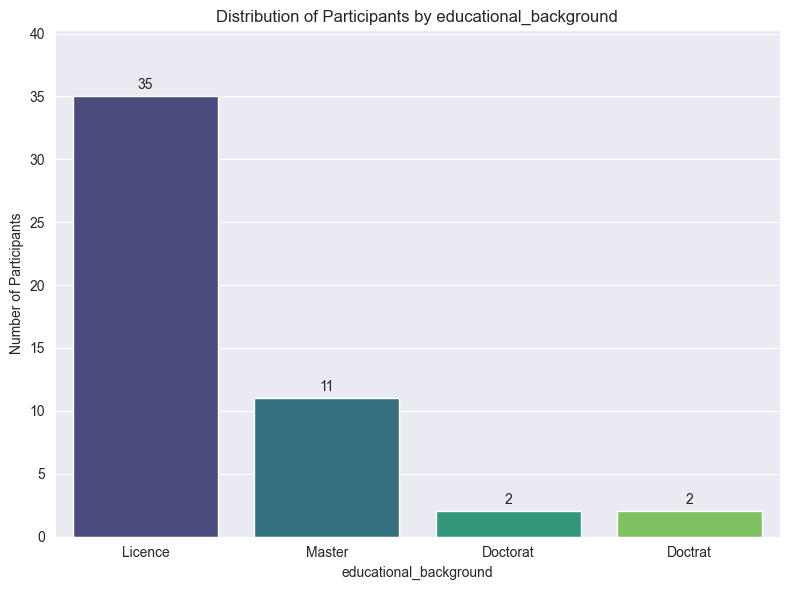


Participant Counts by educational_background:
Licence     35
Master      11
Doctorat     2
Doctrat      2
Name: count, dtype: int64


In [7]:
plot_education_distribution(participant_dfs, 'educational_background')

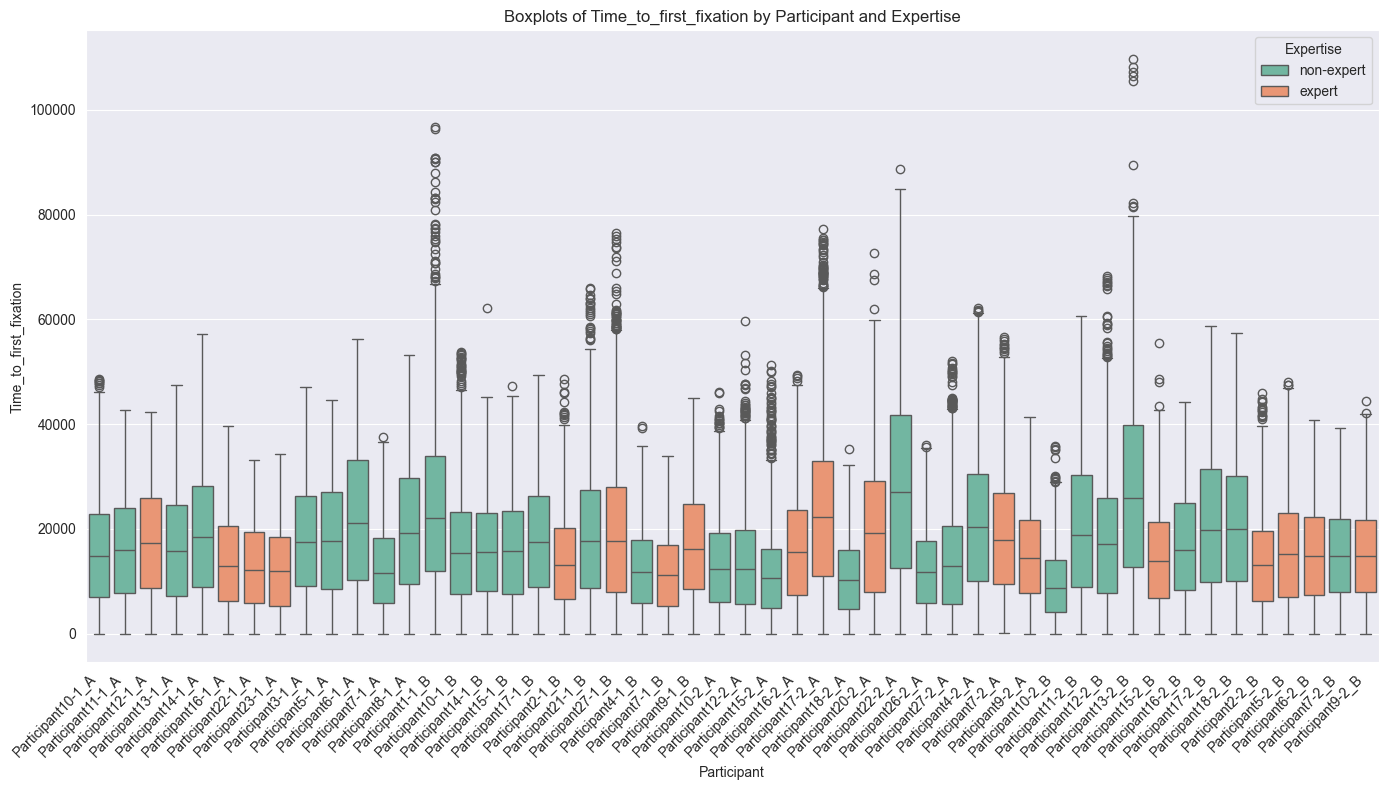

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_participant_fixation_boxplots_by_expertise(participant_dfs, column_name='Time_to_first_fixation'):
    """
    Plots boxplots of a specified column for each participant, grouped by expertise.

    Args:
        participant_dfs (dict): A dictionary where keys are participant IDs and values are pandas DataFrames.
        column_name (str): The name of the column to plot (e.g., 'Time_to_first_fixation').
    """

    data = []
    participant_ids = []
    expertise_labels = []

    for participant_id, df in participant_dfs.items():
        if column_name in df.columns and 'is.expert' in df.columns:
            data.extend(df[column_name].tolist())
            participant_ids.extend([participant_id] * len(df))
            expertise_labels.extend(df['is.expert'].tolist())
        else:
            if column_name not in df.columns:
              print(f"Warning: Column '{column_name}' not found in DataFrame for {participant_id}")
            if 'is.expert' not in df.columns:
              print(f"Warning: Column 'is.expert' not found in DataFrame for {participant_id}")

    if not data:
        print("No data to plot.")
        return

    plot_df = pd.DataFrame({
        'Participant': participant_ids,
        column_name: data,
        'Expertise': expertise_labels
    })

    plt.figure(figsize=(14, 8))  # Adjust figure size for better readability

    # Boxplots grouped by expertise
    sns.boxplot(x='Participant', y=column_name, hue='Expertise', data=plot_df, palette='Set2')

    plt.title(f'Boxplots of {column_name} by Participant and Expertise')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_participant_fixation_boxplots_by_expertise(participant_dfs, column_name='Time_to_first_fixation')

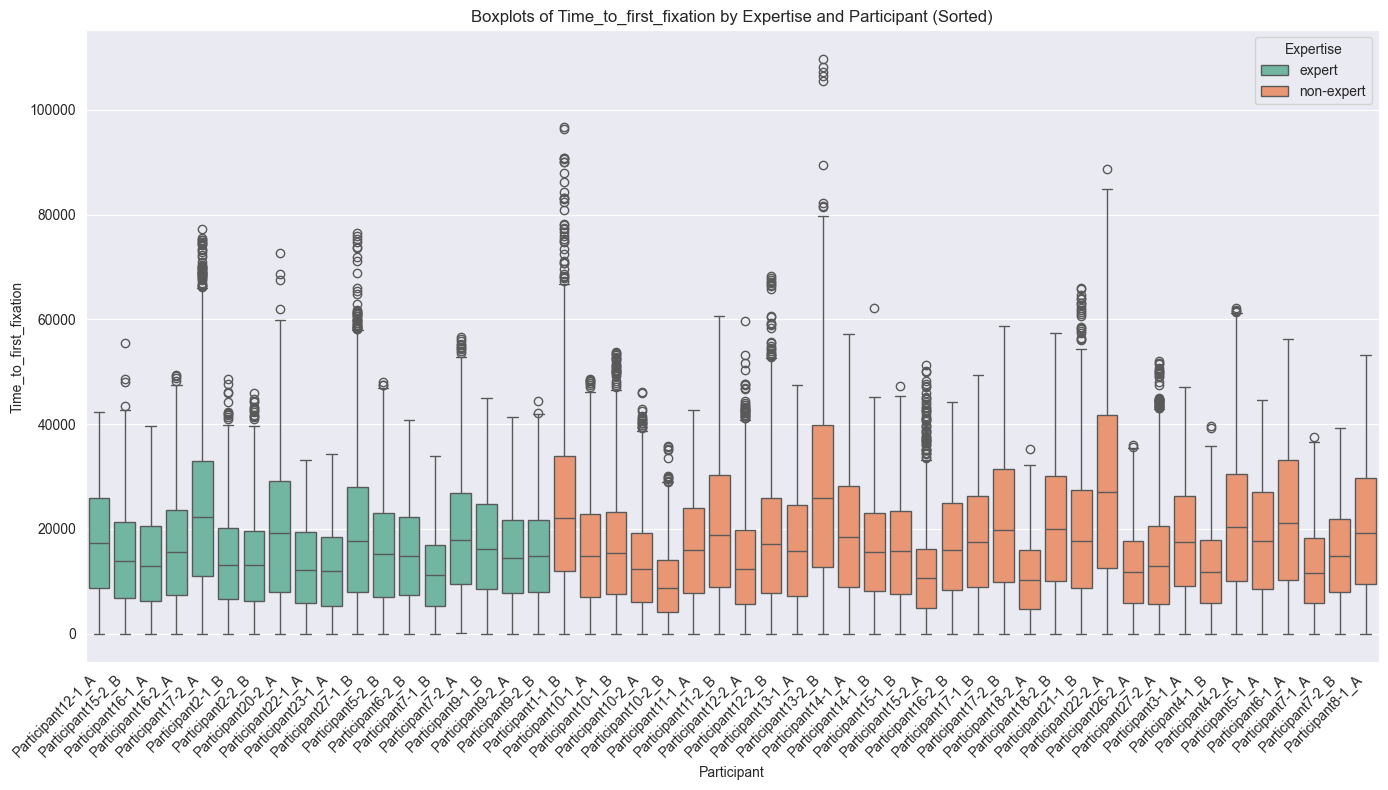

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_fixation_boxplots_by_expertise_sorted(participant_dfs, column_name='Time_to_first_fixation'):
    """
    Plots boxplots of a specified column, grouped by expertise, with participants within each expertise group, with sorted data.

    Args:
        participant_dfs (dict): A dictionary where keys are participant IDs and values are pandas DataFrames.
        column_name (str): The name of the column to plot (e.g., 'Time_to_first_fixation').
    """

    data = []
    participant_ids = []
    expertise_labels = []

    for participant_id, df in participant_dfs.items():
        if column_name in df.columns and 'is.expert' in df.columns:
            data.extend(df[column_name].tolist())
            participant_ids.extend([participant_id] * len(df))
            expertise_labels.extend(df['is.expert'].tolist())
        else:
            if column_name not in df.columns:
                print(f"Warning: Column '{column_name}' not found in DataFrame for {participant_id}")
            if 'is.expert' not in df.columns:
                print(f"Warning: Column 'is.expert' not found in DataFrame for {participant_id}")

    if not data:
        print("No data to plot.")
        return

    plot_df = pd.DataFrame({
        'Participant': participant_ids,
        column_name: data,
        'Expertise': expertise_labels
    })

    # Sort the DataFrame by 'Expertise' and then 'Participant'
    plot_df = plot_df.sort_values(by=['Expertise', 'Participant'])

    plt.figure(figsize=(14, 8))

    # Boxplots grouped by expertise, with participants within each group
    sns.boxplot(x='Participant', y=column_name, hue='Expertise', data=plot_df, palette='Set2')

    plt.title(f'Boxplots of {column_name} by Expertise and Participant (Sorted)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_fixation_boxplots_by_expertise_sorted(participant_dfs, column_name='Time_to_first_fixation')

In [26]:
import pandas as pd

data = pd.read_csv('ETdata__for_.csv', delimiter="\t", quoting=0, low_memory=False)

numerical_columns = []
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        numerical_columns.append(column)

print(numerical_columns)

['age', 'screenid', 'Sentence_index', 'Word_index', 'Total_duration_of_fixations', 'Average_duration_of_fixations', 'Minimum_duration_of_fixations', 'Maximum_duration_of_fixations', 'Number_of_fixations', 'Time_to_first_fixation', 'Duration_of_first_fixation', 'Average_pupil_diameter', 'Total_duration_of_whole_fixations', 'Average_duration_of_whole_fixations', 'Minimum_duration_of_whole_fixations', 'Maximum_duration_of_whole_fixations', 'Number_of_whole_fixations', 'Time_to_first_whole_fixation', 'Duration_of_first_whole_fixation', 'Average_whole-fixation_pupil_diameter', 'Total_duration_of_Visit', 'Average_duration_of_Visit', 'Minimum_duration_of_Visit', 'Maximum_duration_of_Visit', 'Number_of_Visits', 'Time_to_first_Visit', 'Duration_of_first_Visit', 'Number_of_saccades_in_AOI', 'Time_to_entry_saccade', 'Time_to_exit_saccade', 'Peak_velocity_of_entry_saccade', 'Peak_velocity_of_exit_saccade', 'First-pass_first_fixation_duration', 'First-pass_duration', 'Selective_regression-path_dura

In [27]:
# Remove unwanted numerical columns
unwanted_columns = ['age', 'screenid', 'Sentence_index', 'Word_index', 'Average_eye_openness']

numerical_columns = [col for col in numerical_columns if col not in unwanted_columns]

In [ ]:
plot_scatter_by_columns(text_type_version_dfs, numerical_columns)

Column: Total_duration_of_fixations
count    193908.000000
mean        275.625245
std         344.167539
min           0.000000
25%           0.000000
50%         200.000000
75%         370.000000
max        8548.000000
Name: Total_duration_of_fixations, dtype: float64


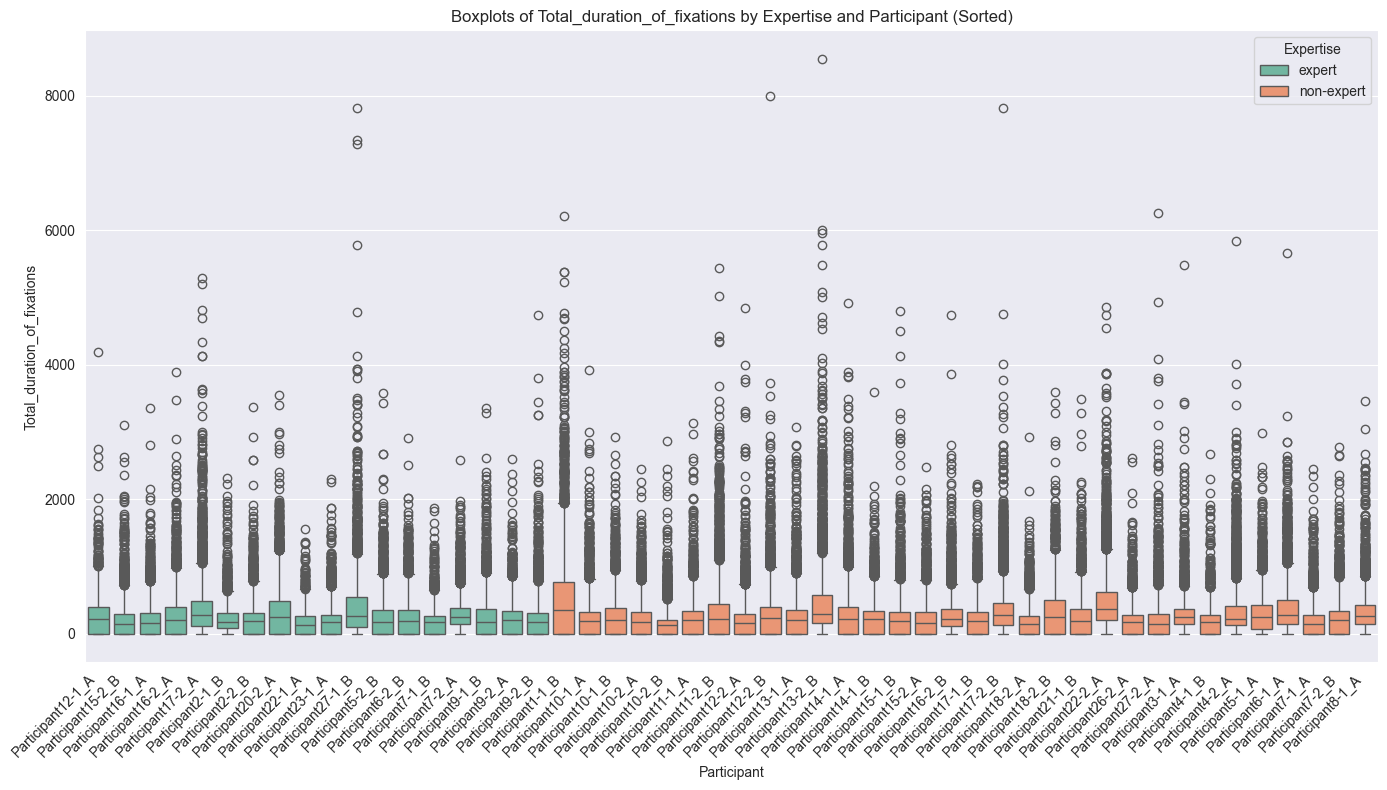



Column: Average_duration_of_fixations
count    138360.000000
mean        205.108153
std          77.278152
min           1.000000
25%         157.000000
50%         192.000000
75%         238.000000
max        1670.000000
Name: Average_duration_of_fixations, dtype: float64


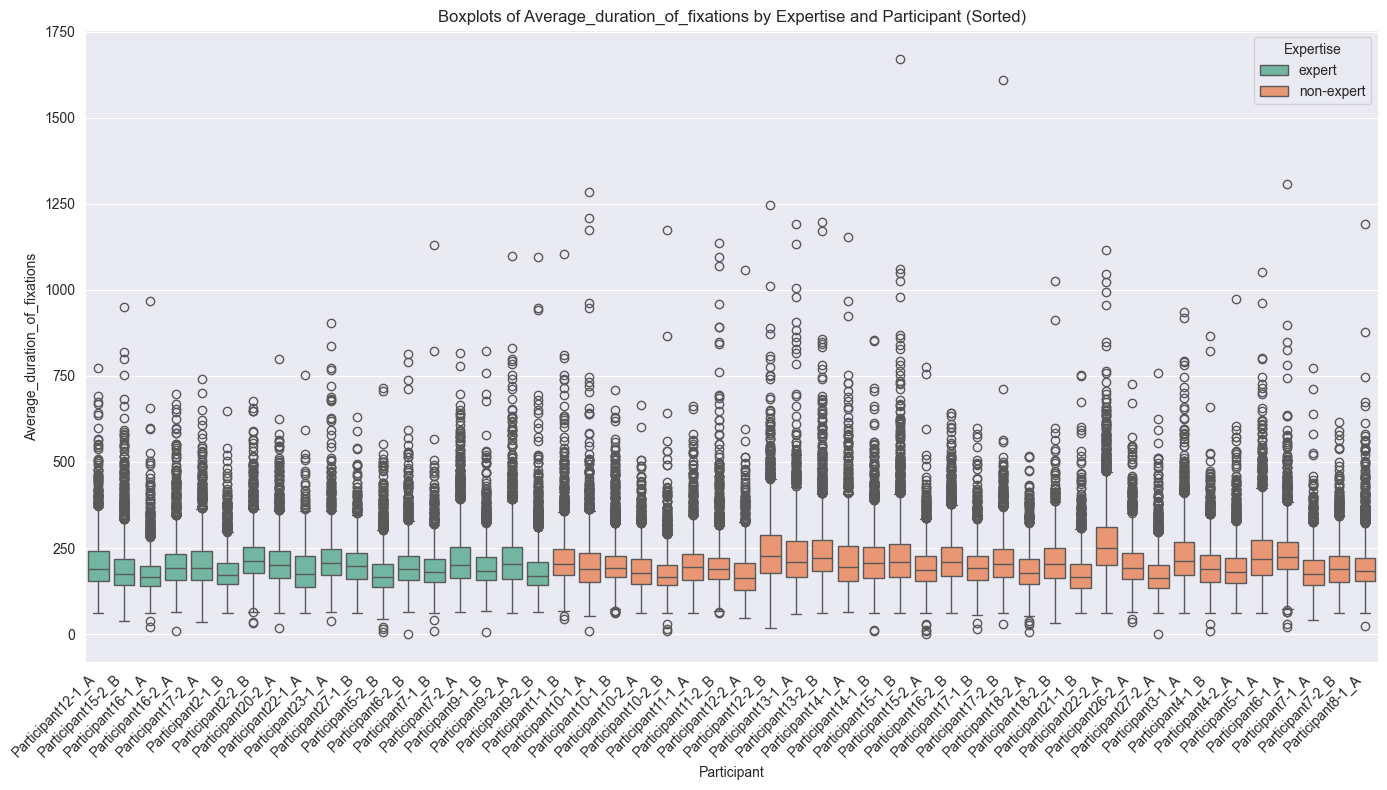



Column: Minimum_duration_of_fixations
count    138360.000000
mean        179.091580
std          78.947309
min           0.000000
25%         128.000000
50%         163.000000
75%         213.000000
max        1670.000000
Name: Minimum_duration_of_fixations, dtype: float64


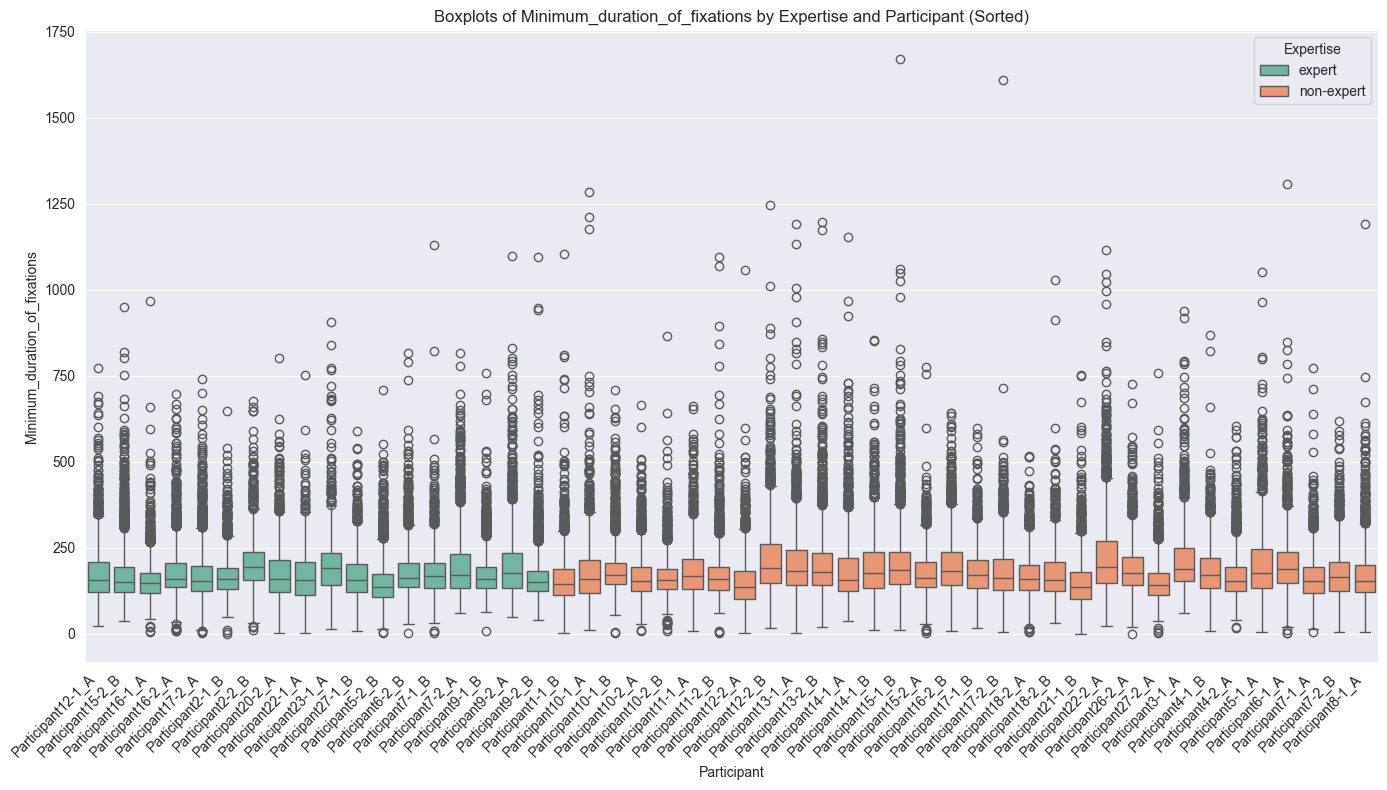



Column: Maximum_duration_of_fixations
count    138360.000000
mean        235.172196
std         107.558316
min           1.000000
25%         167.000000
50%         215.000000
75%         275.000000
max        4137.000000
Name: Maximum_duration_of_fixations, dtype: float64


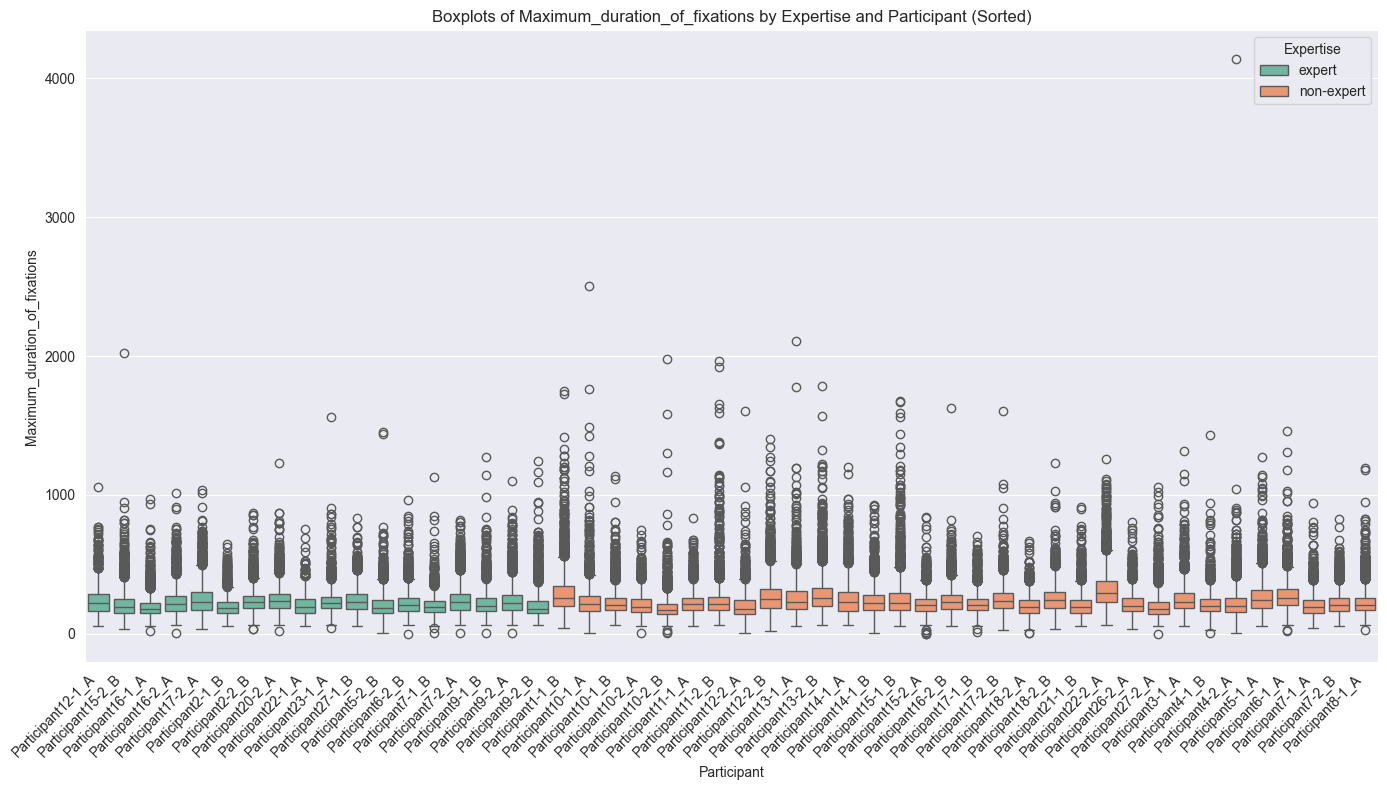



Column: Number_of_fixations
count    193908.000000
mean          1.682122
std          61.239444
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max       15605.000000
Name: Number_of_fixations, dtype: float64


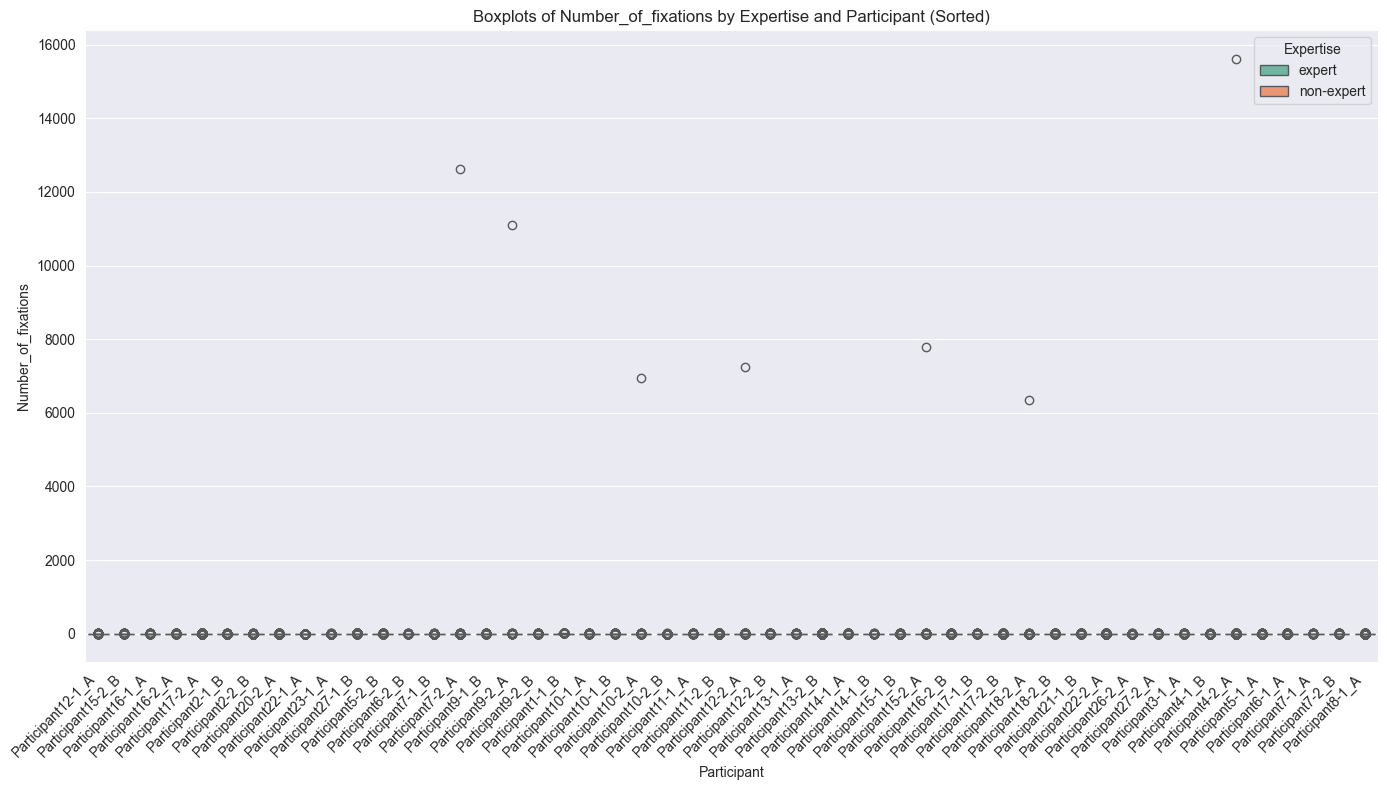



Column: Time_to_first_fixation
count    138360.000000
mean      17060.534822
std       11938.346637
min           0.000000
25%        7548.000000
50%       15517.500000
75%       24416.000000
max      109648.000000
Name: Time_to_first_fixation, dtype: float64


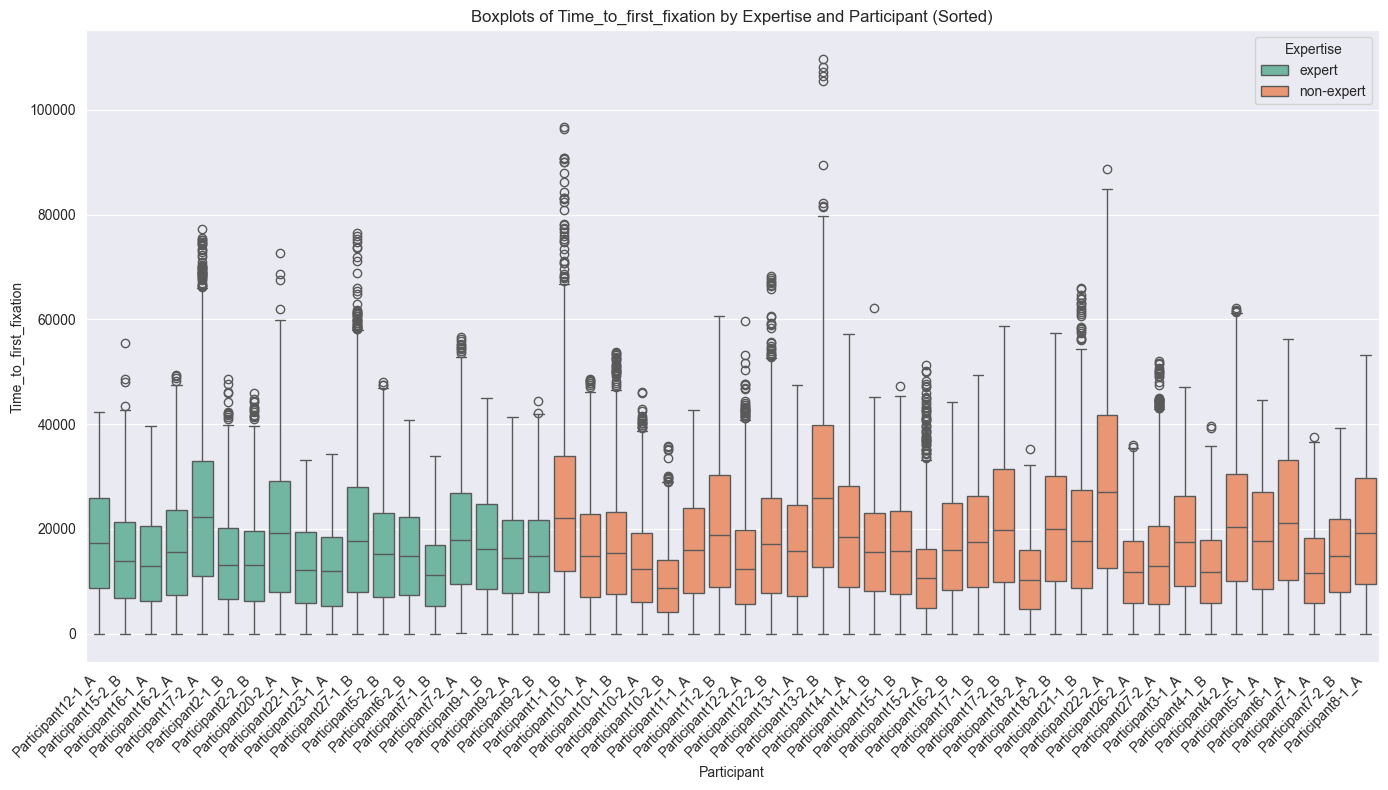



Column: Duration_of_first_fixation
count    138360.000000
mean        208.617242
std          91.519804
min           1.000000
25%         150.000000
50%         192.000000
75%         248.000000
max        2020.000000
Name: Duration_of_first_fixation, dtype: float64


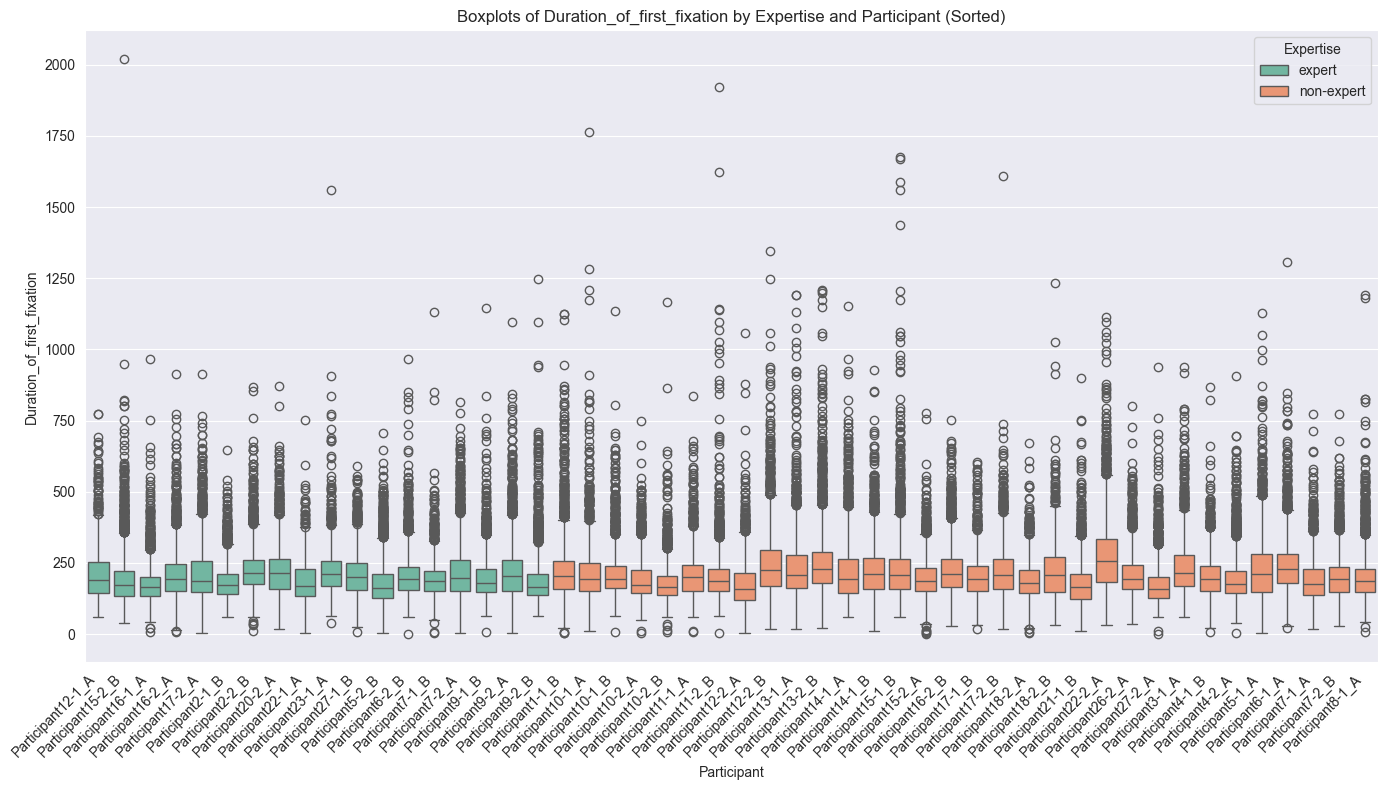



Column: Average_pupil_diameter
count    138360.000000
mean          3.409558
std           6.064082
min           1.798550
25%           2.938345
50%           3.262910
75%           3.714560
max        1138.000000
Name: Average_pupil_diameter, dtype: float64


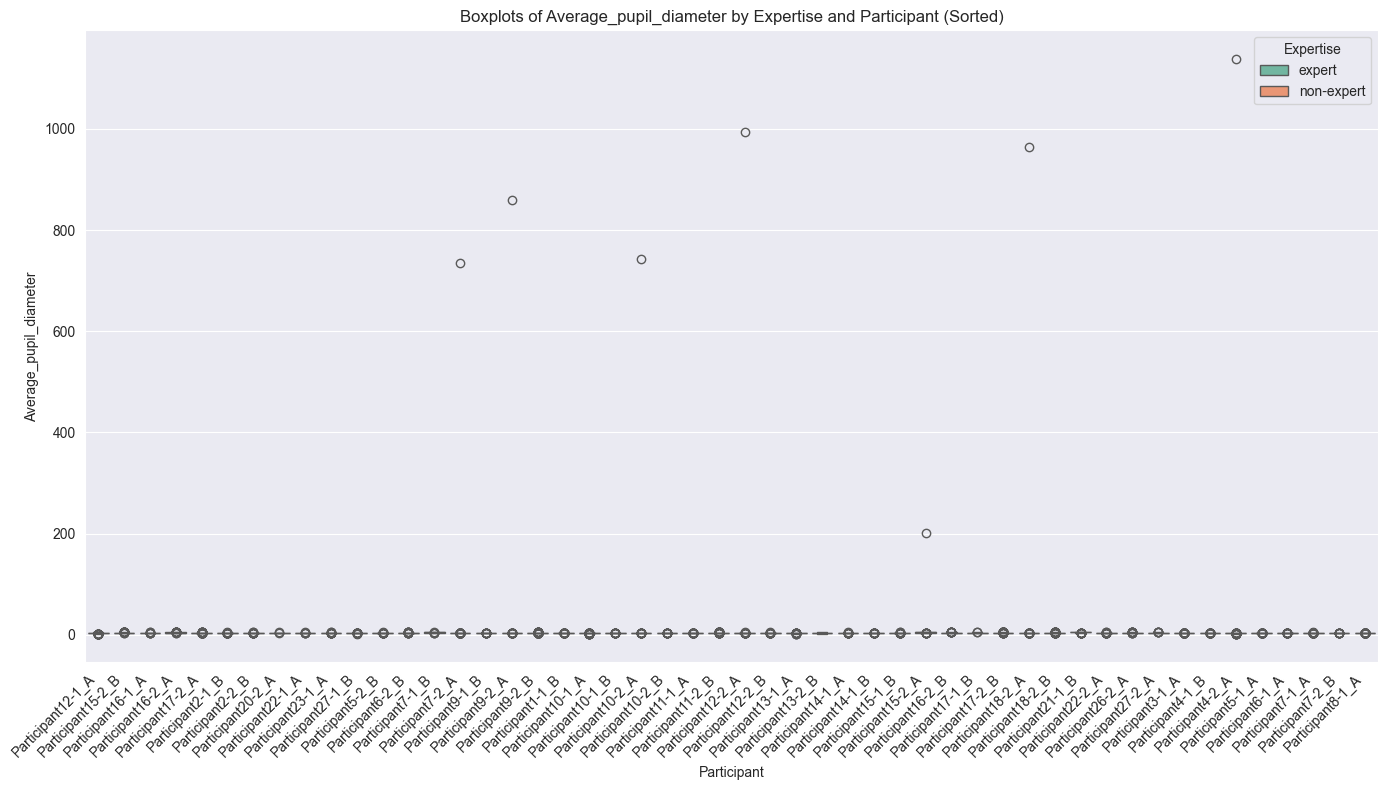



Column: Total_duration_of_whole_fixations
count    193908.000000
mean        271.541303
std         340.791954
min           0.000000
25%           0.000000
50%         198.000000
75%         365.000000
max        8368.000000
Name: Total_duration_of_whole_fixations, dtype: float64


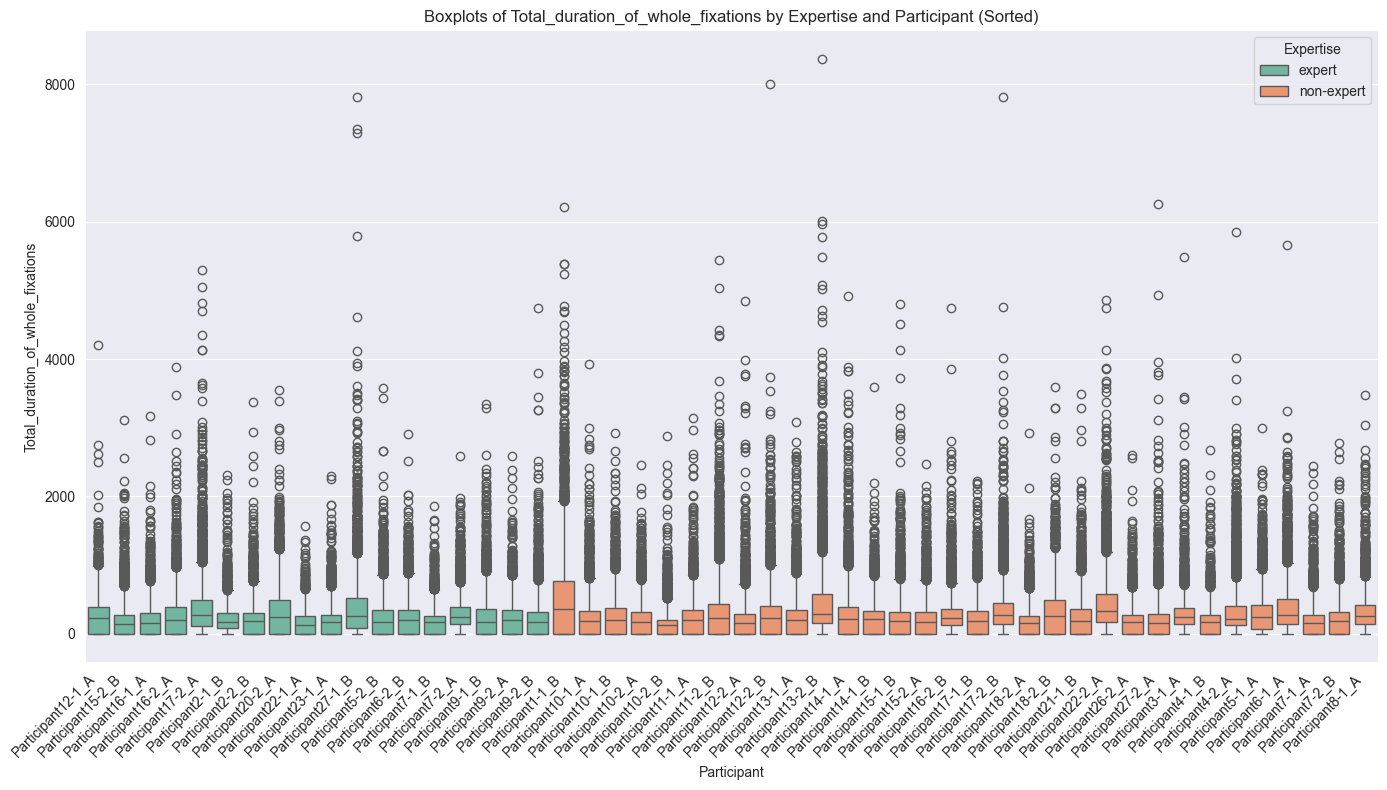



Column: Average_duration_of_whole_fixations
count    137322.000000
mean        205.550655
std          77.292240
min          60.000000
25%         157.000000
50%         192.000000
75%         238.000000
max        1670.000000
Name: Average_duration_of_whole_fixations, dtype: float64


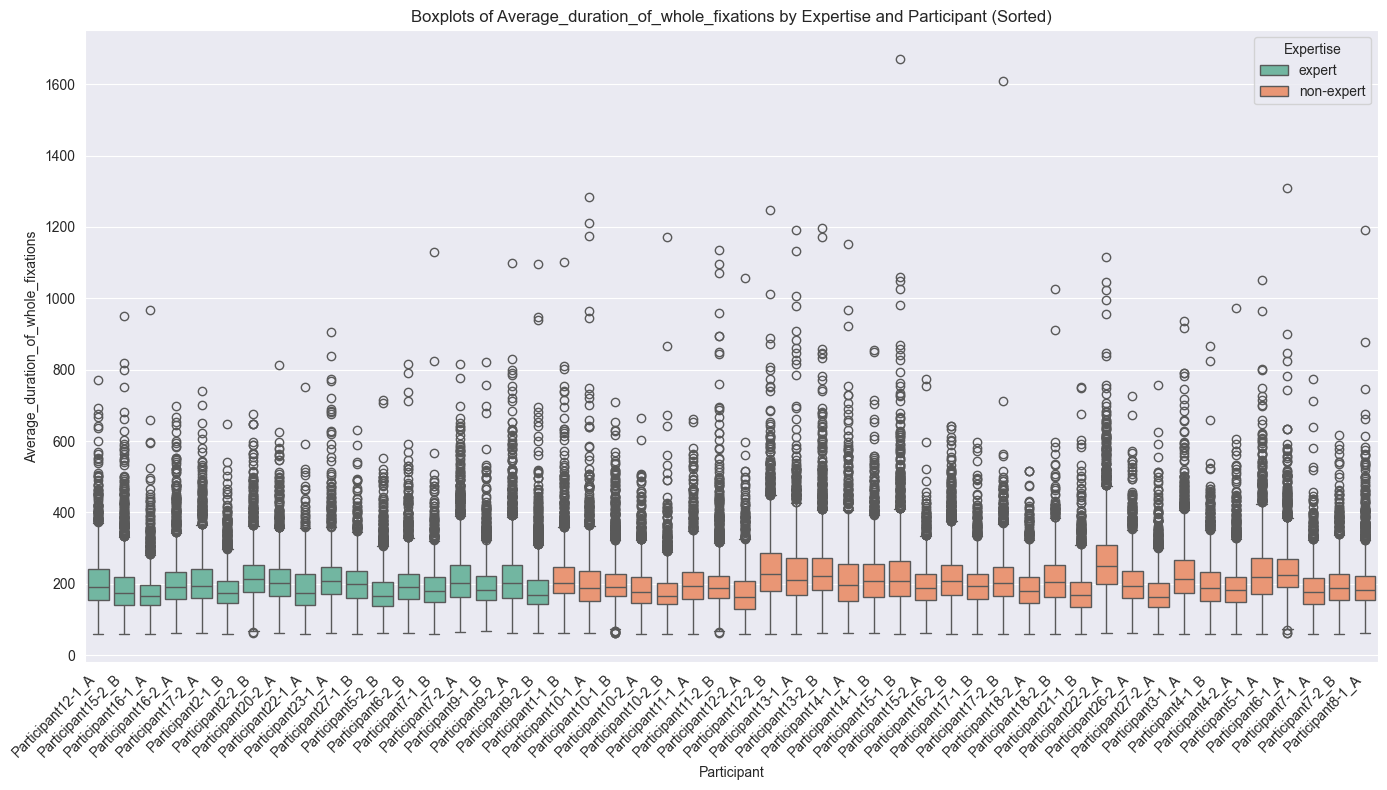



Column: Minimum_duration_of_whole_fixations
count    137322.000000
mean        180.129906
std          78.725760
min          60.000000
25%         130.000000
50%         163.000000
75%         213.000000
max        1670.000000
Name: Minimum_duration_of_whole_fixations, dtype: float64


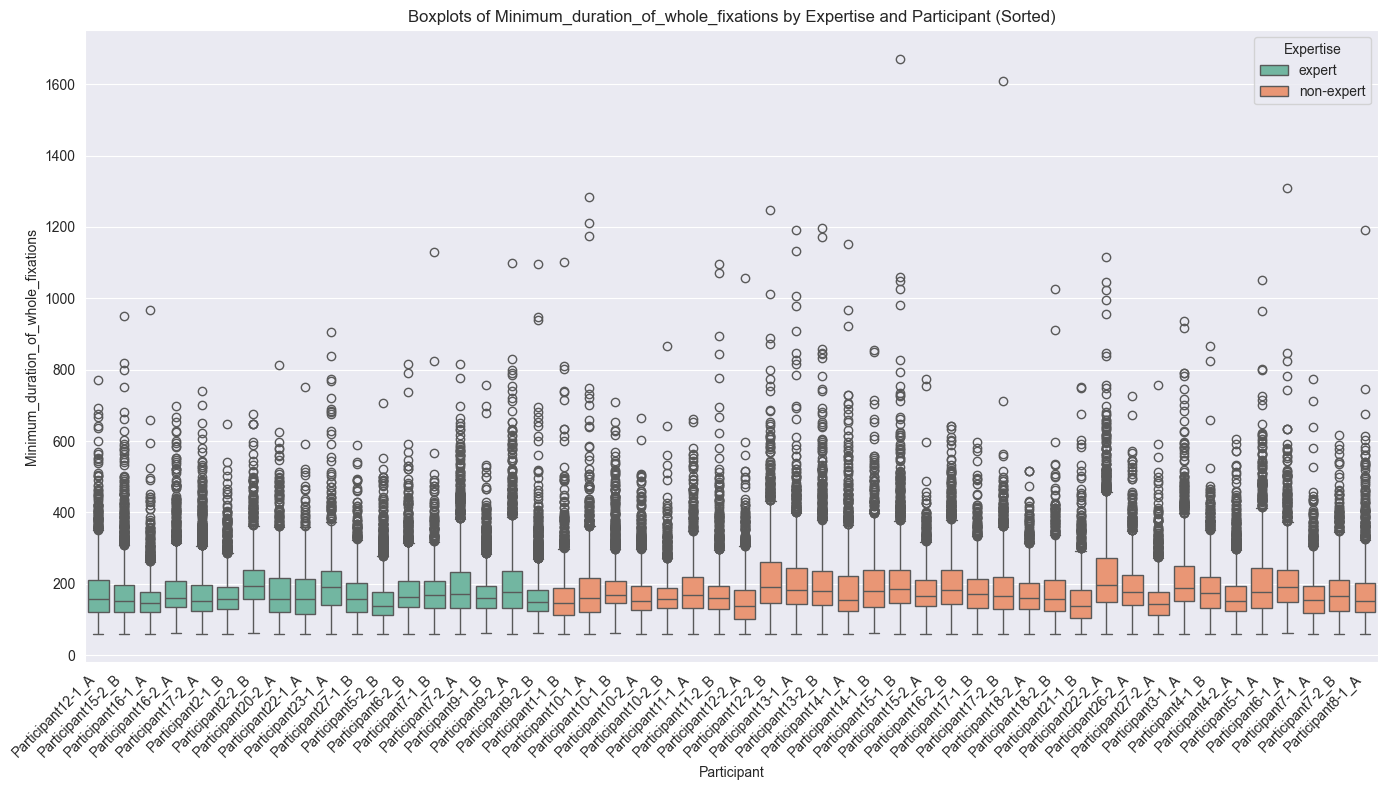



Column: Maximum_duration_of_whole_fixations
count    137322.000000
mean        234.923829
std         107.149469
min           1.000000
25%         167.000000
50%         215.000000
75%         275.000000
max        4137.000000
Name: Maximum_duration_of_whole_fixations, dtype: float64


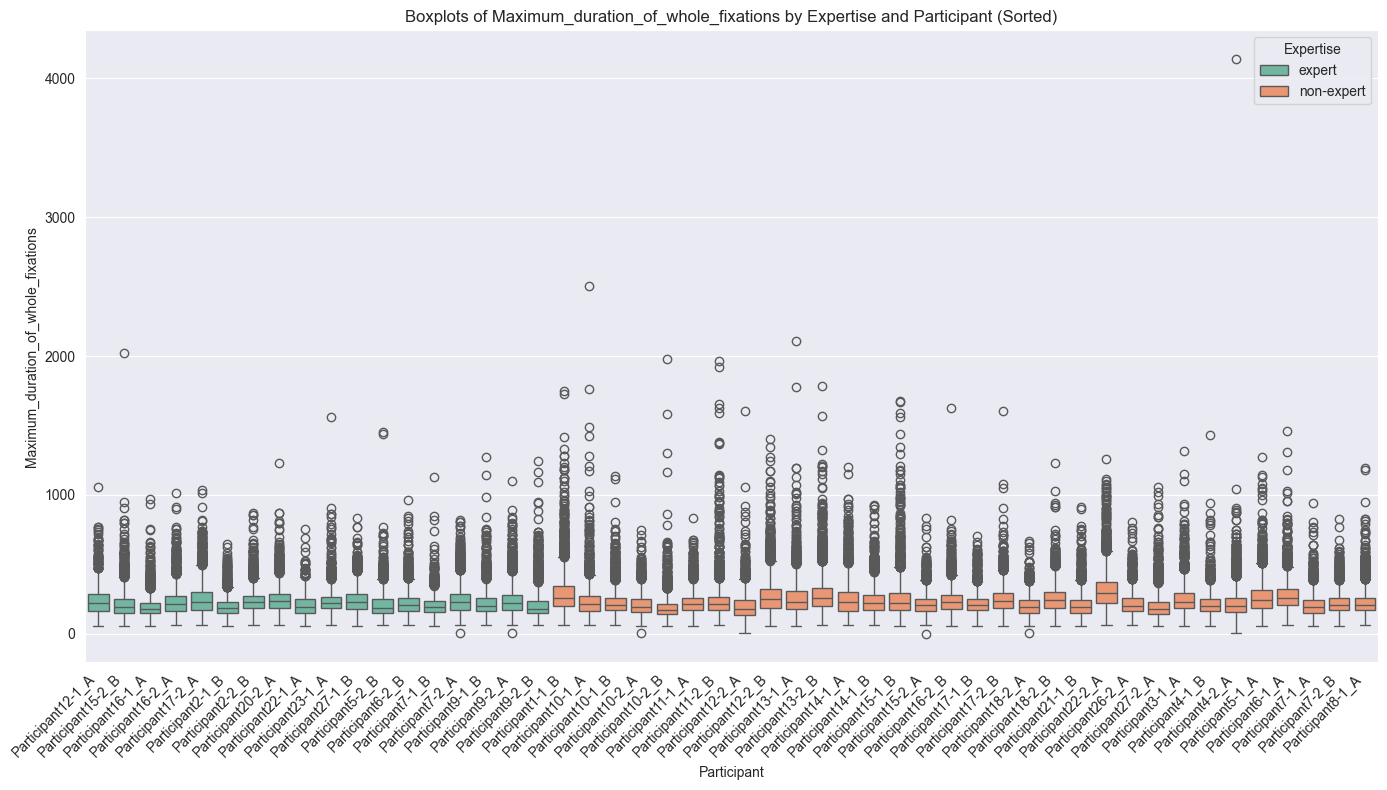



Column: Number_of_whole_fixations
count    193908.000000
mean          1.659179
std          61.239147
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max       15605.000000
Name: Number_of_whole_fixations, dtype: float64


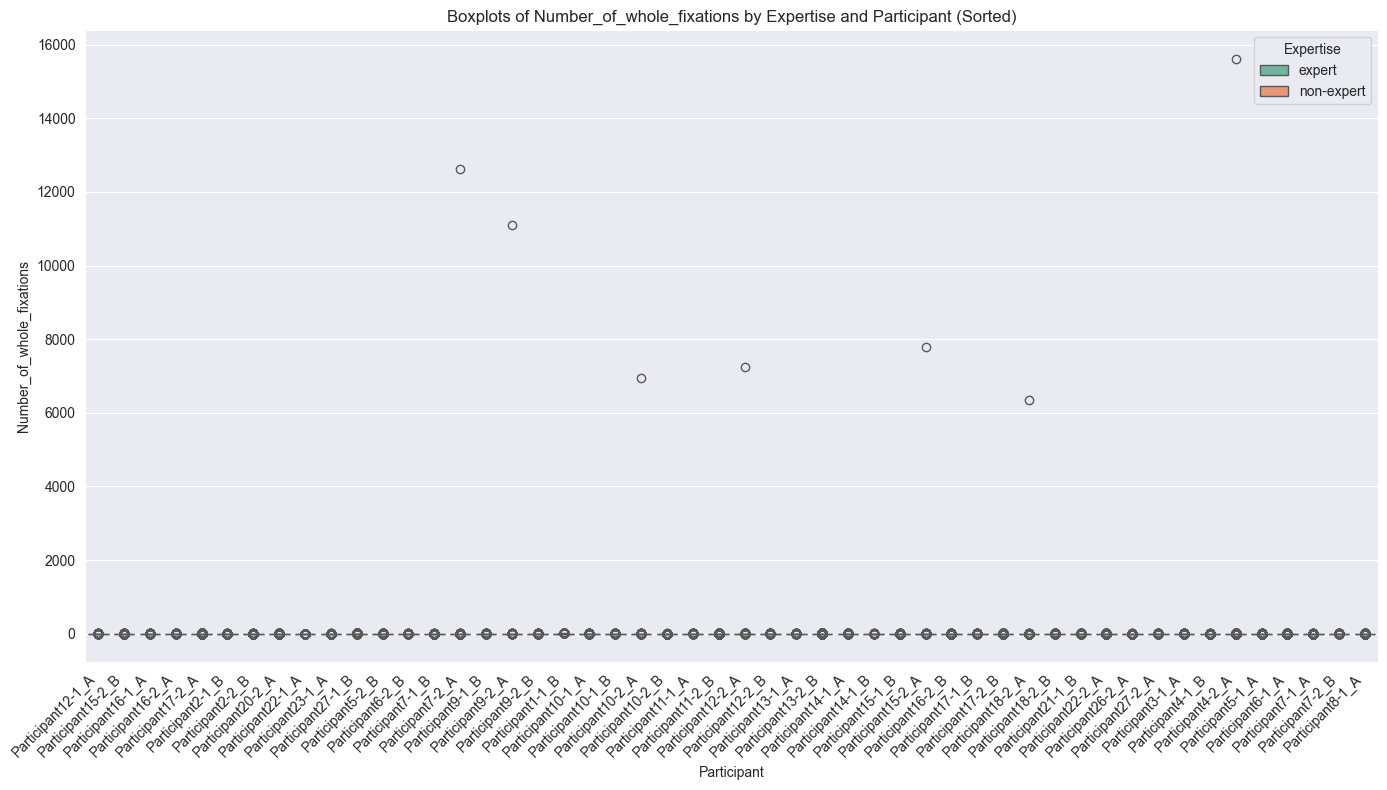



Column: Time_to_first_whole_fixation
count    137322.000000
mean      17095.132062
std       11871.142418
min           0.000000
25%        7644.000000
50%       15508.000000
75%       24377.000000
max      108208.000000
Name: Time_to_first_whole_fixation, dtype: float64


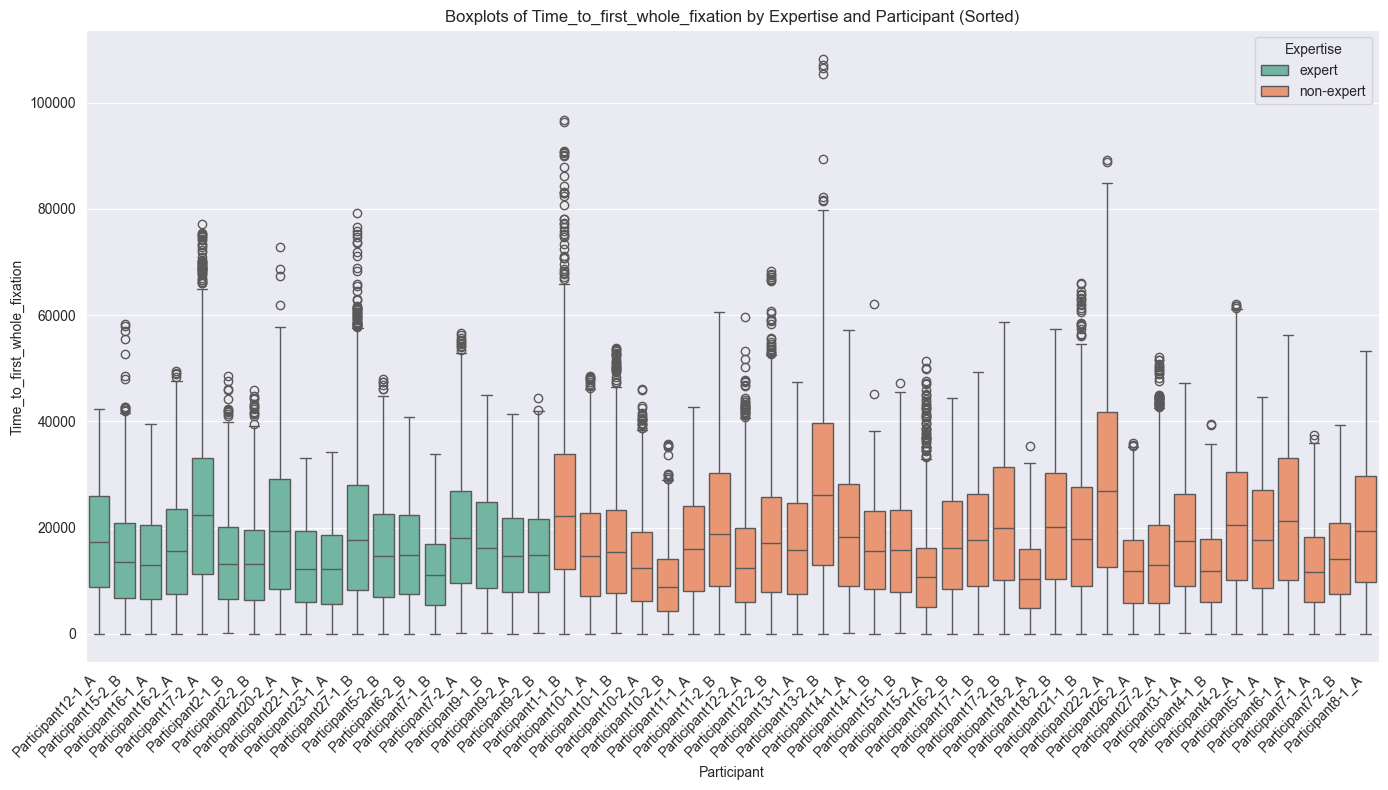



Column: Duration_of_first_whole_fixation
count    137322.000000
mean        209.163605
std          91.502918
min           2.538510
25%         150.000000
50%         193.000000
75%         248.000000
max        2020.000000
Name: Duration_of_first_whole_fixation, dtype: float64


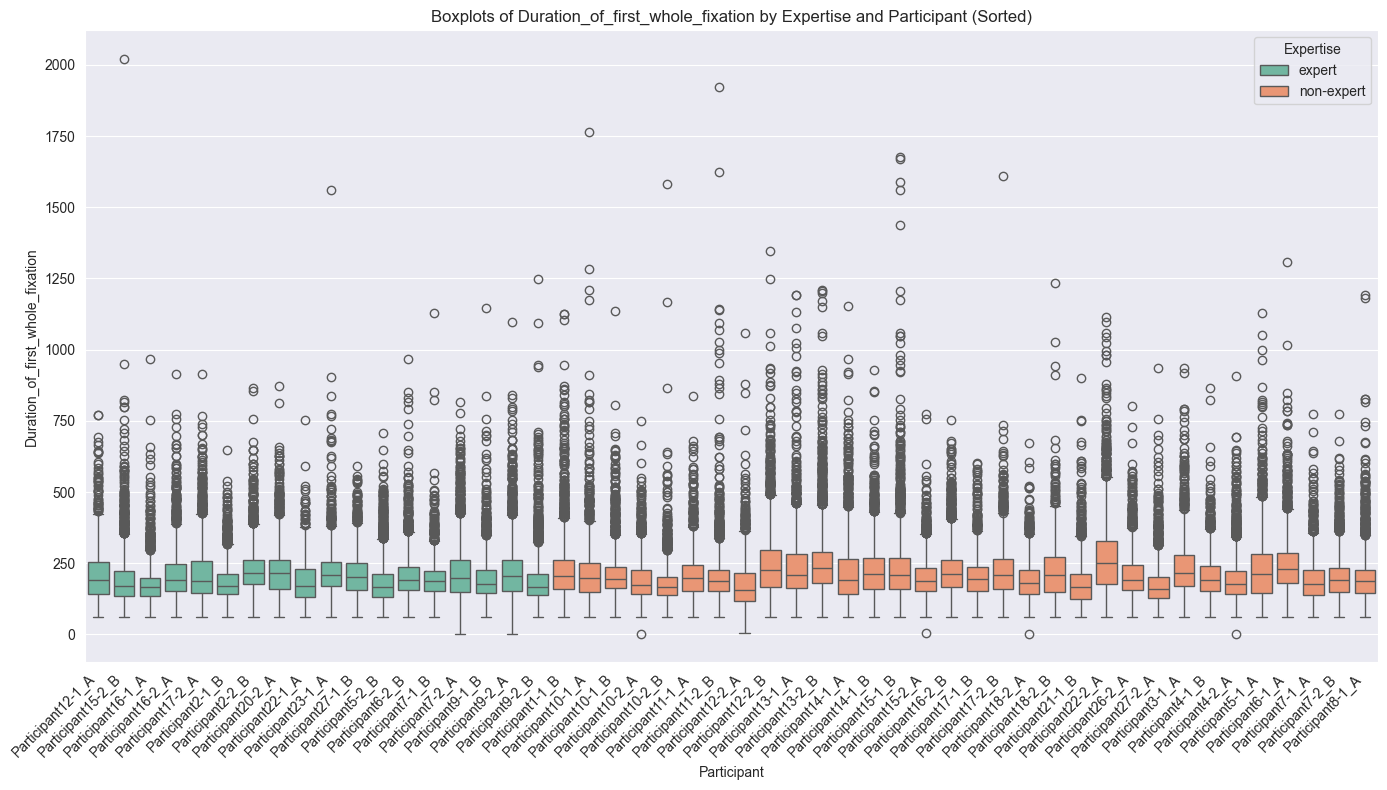



Column: Average_whole-fixation_pupil_diameter
count    137322.000000
mean          3.414171
std           6.591571
min           1.798550
25%           2.939862
50%           3.264765
75%           3.714748
max        1257.000000
Name: Average_whole-fixation_pupil_diameter, dtype: float64


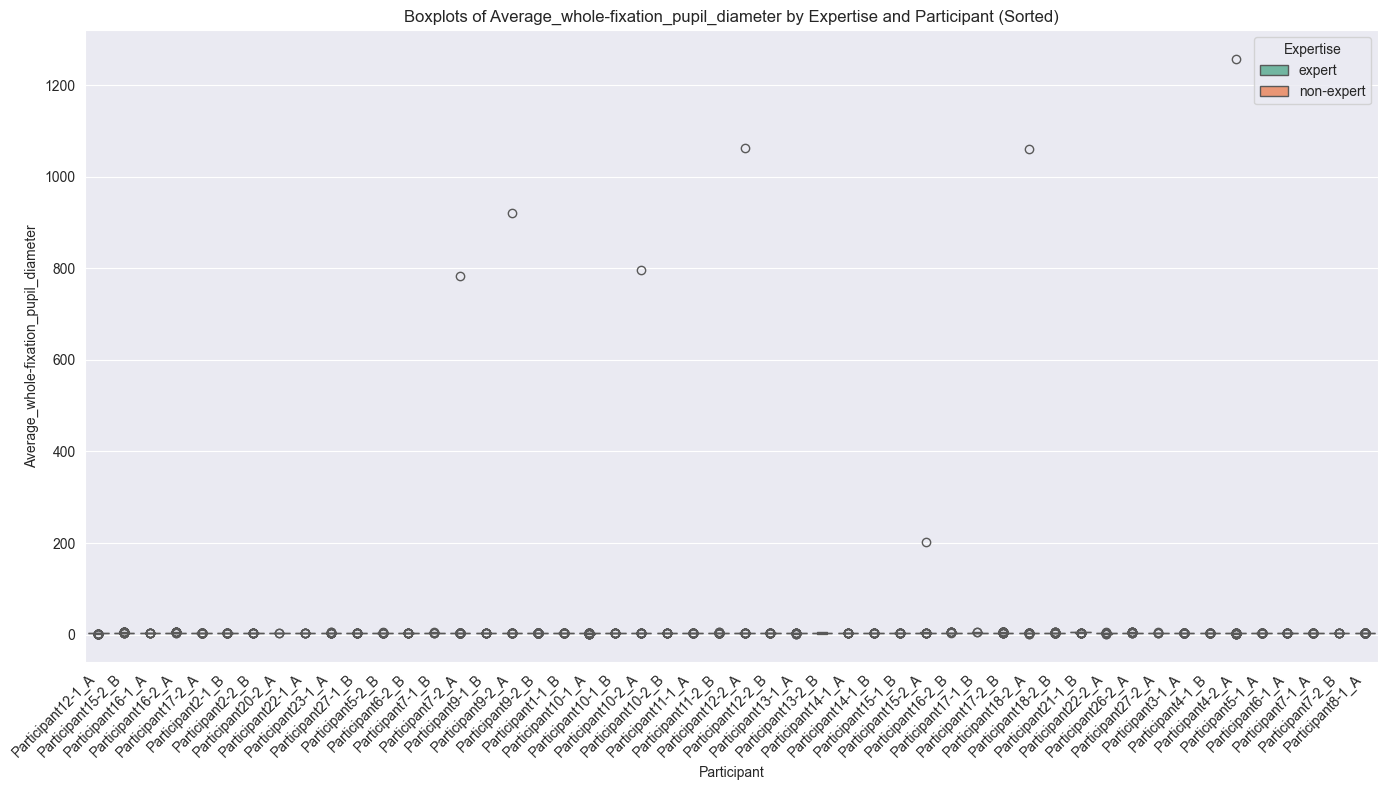



Column: Total_duration_of_Visit
count    180662.000000
mean        289.098333
std         373.192286
min           0.000000
25%           0.000000
50%         202.000000
75%         385.000000
max        9156.000000
Name: Total_duration_of_Visit, dtype: float64


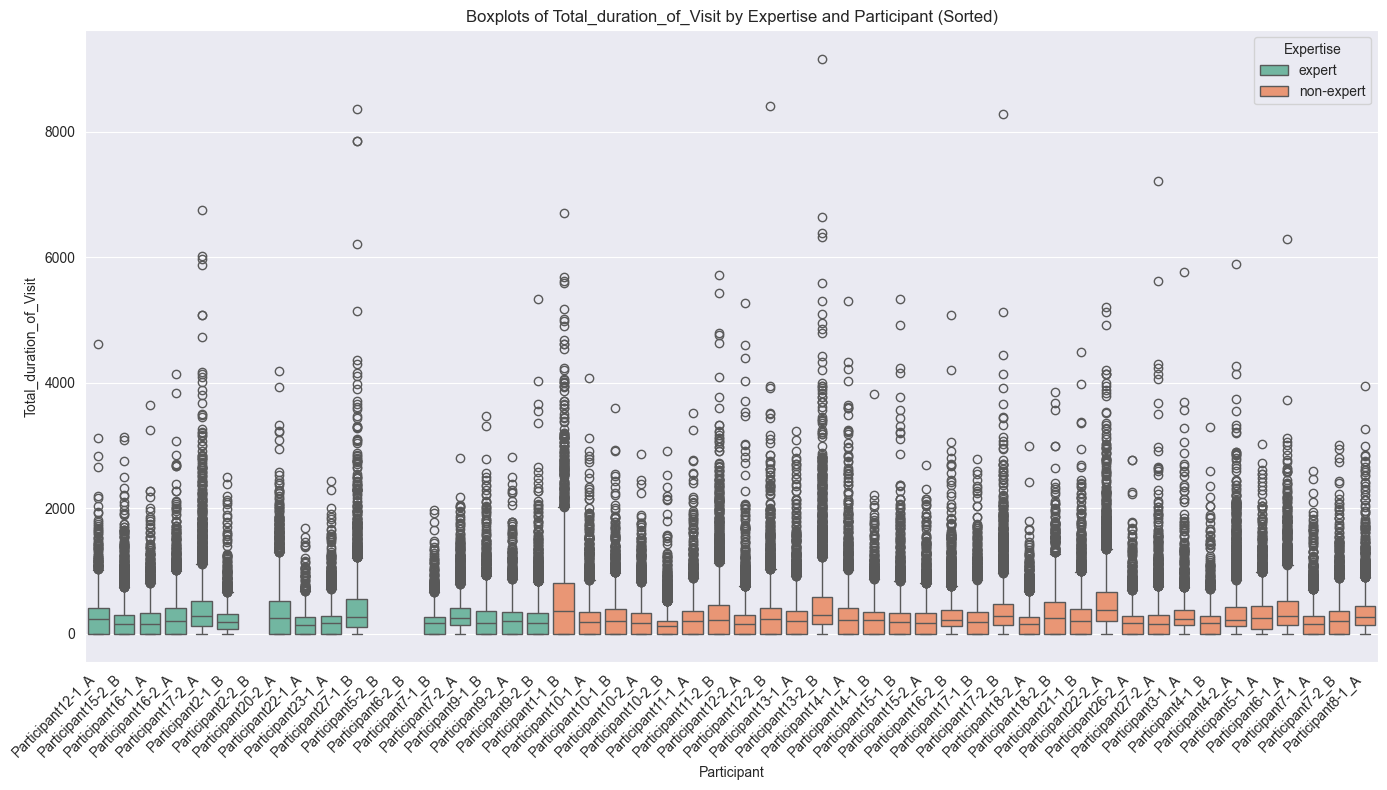



Column: Average_duration_of_Visit
count    129402.000000
mean        283.239463
std         224.137950
min           1.000000
25%         167.000000
50%         223.000000
75%         322.000000
max        6645.000000
Name: Average_duration_of_Visit, dtype: float64


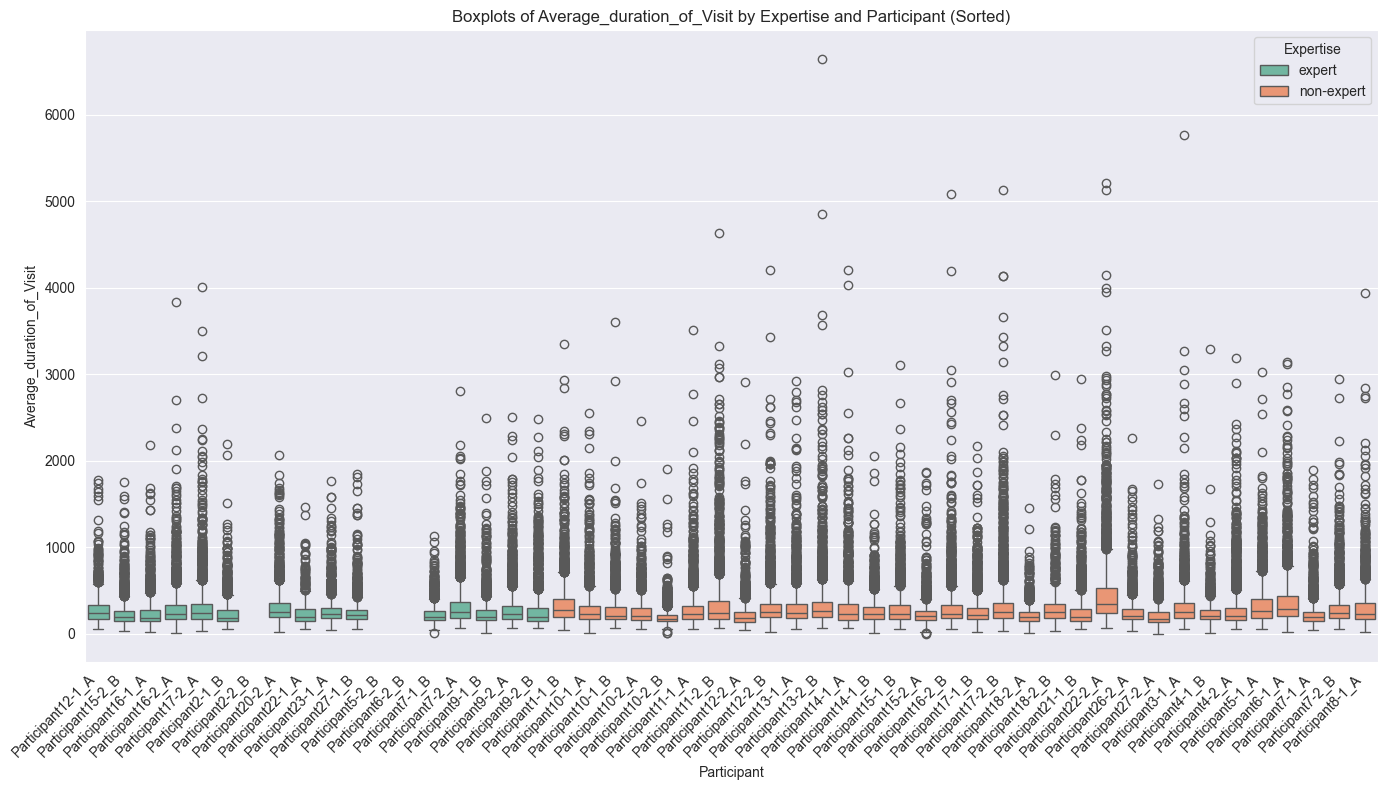



Column: Minimum_duration_of_Visit
count    129402.000000
mean        253.896045
std         216.386198
min           0.000000
25%         147.000000
50%         195.000000
75%         285.000000
max        6645.000000
Name: Minimum_duration_of_Visit, dtype: float64


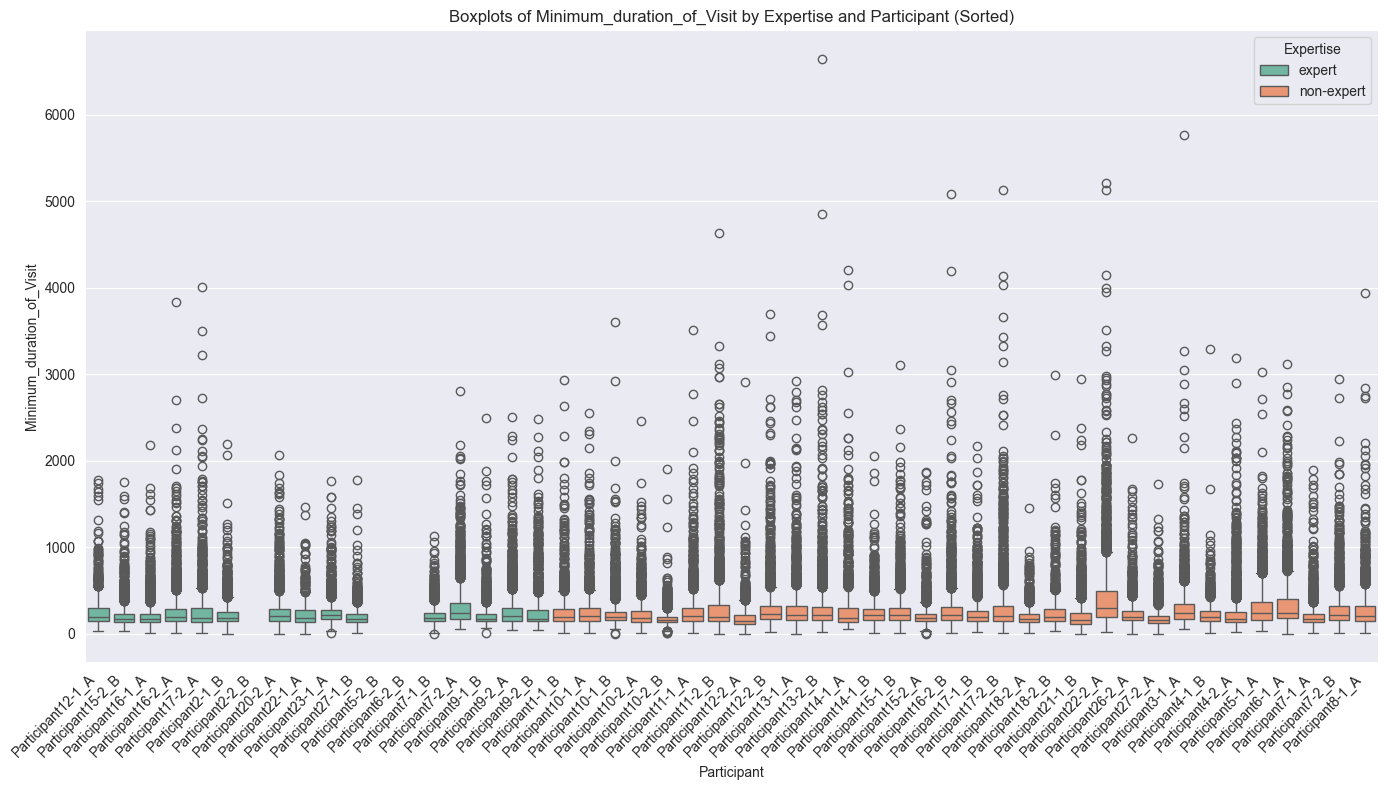



Column: Maximum_duration_of_Visit
count    129402.000000
mean        316.553253
std         269.867815
min           1.000000
25%         175.000000
50%         240.000000
75%         363.000000
max        6645.000000
Name: Maximum_duration_of_Visit, dtype: float64


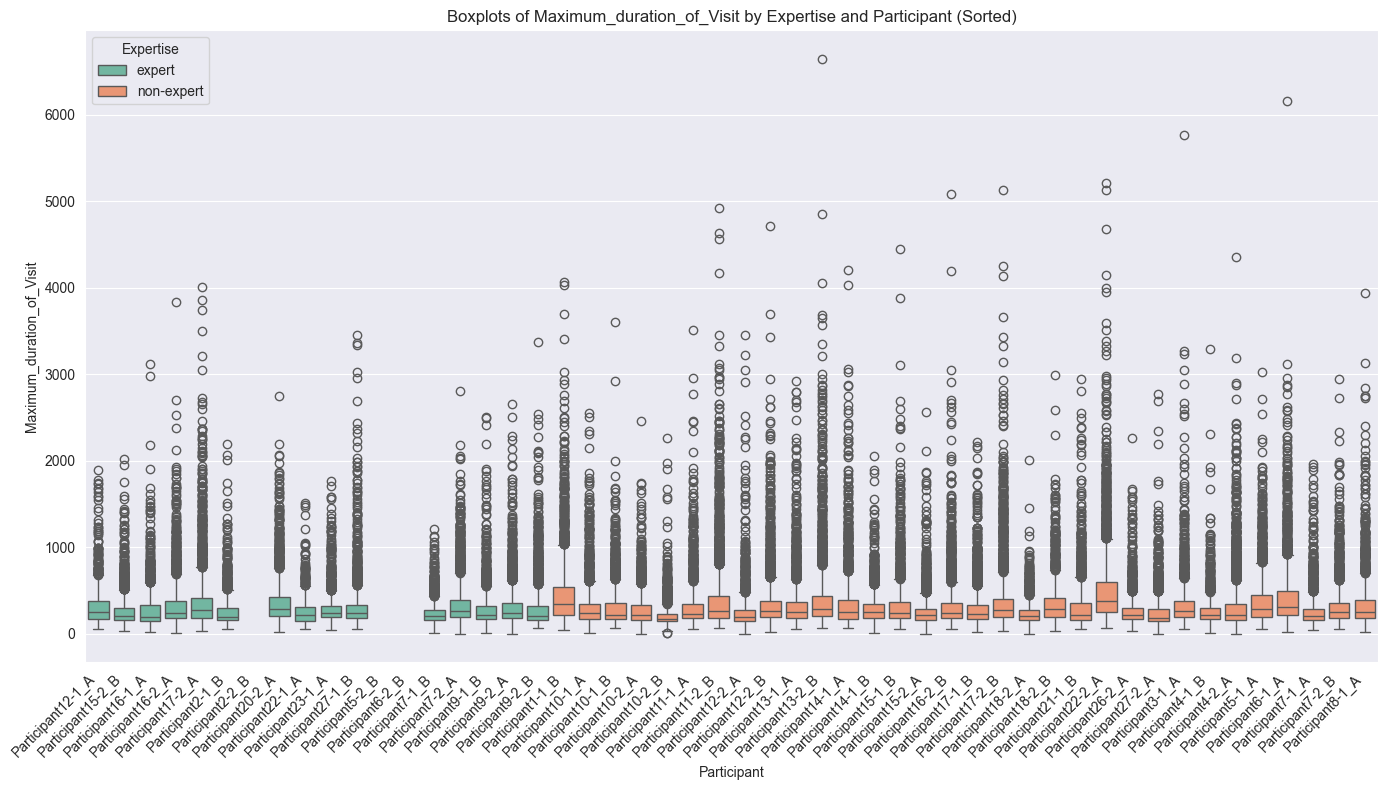



Column: Number_of_Visits
count    180662.000000
mean          1.398069
std          63.434882
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max       15605.000000
Name: Number_of_Visits, dtype: float64


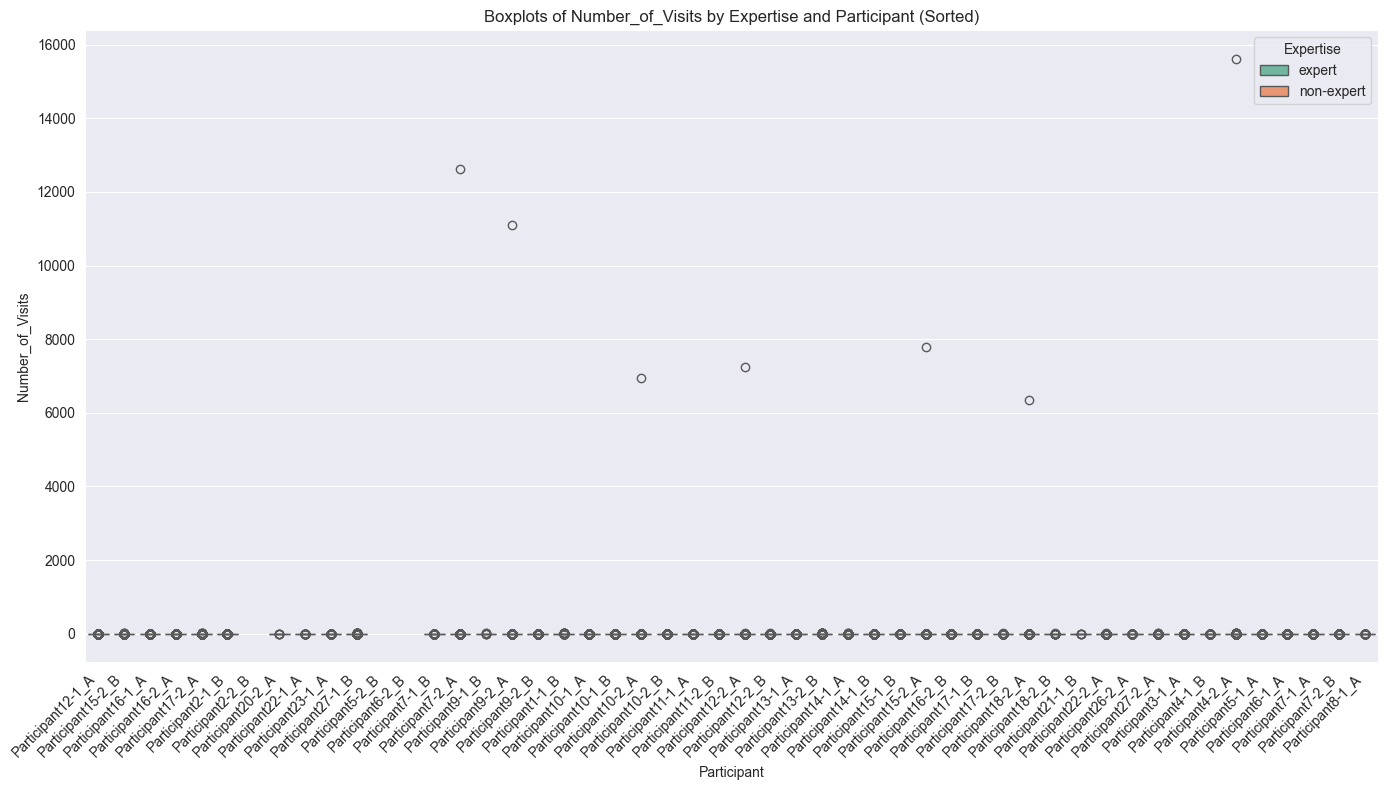



Column: Time_to_first_Visit
count    129402.000000
mean      17219.512511
std       12071.536267
min           0.000000
25%        7593.000000
50%       15615.500000
75%       24642.000000
max      109648.000000
Name: Time_to_first_Visit, dtype: float64


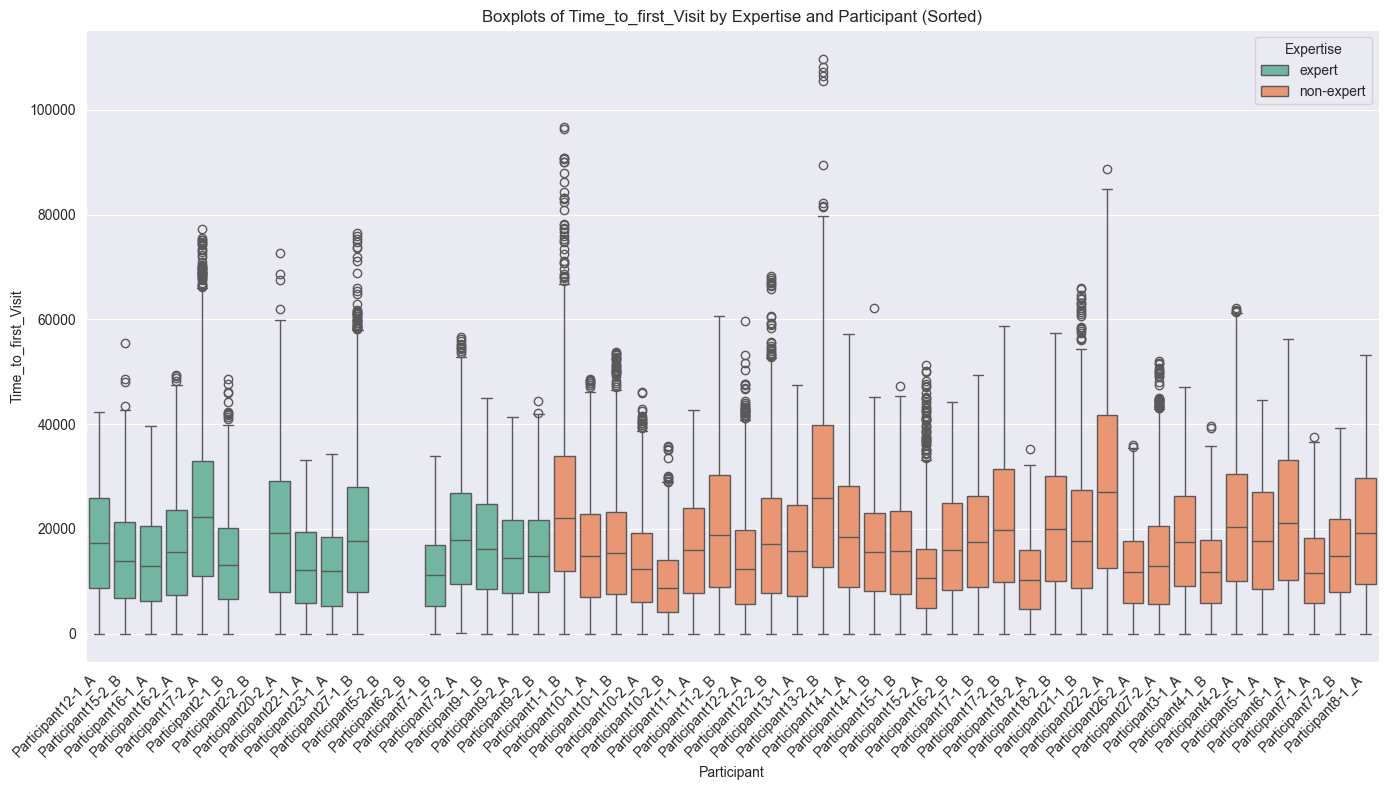



Column: Duration_of_first_Visit
count    129402.000000
mean        286.792190
std         244.386435
min           0.000000
25%         160.000000
50%         218.000000
75%         328.000000
max        6645.000000
Name: Duration_of_first_Visit, dtype: float64


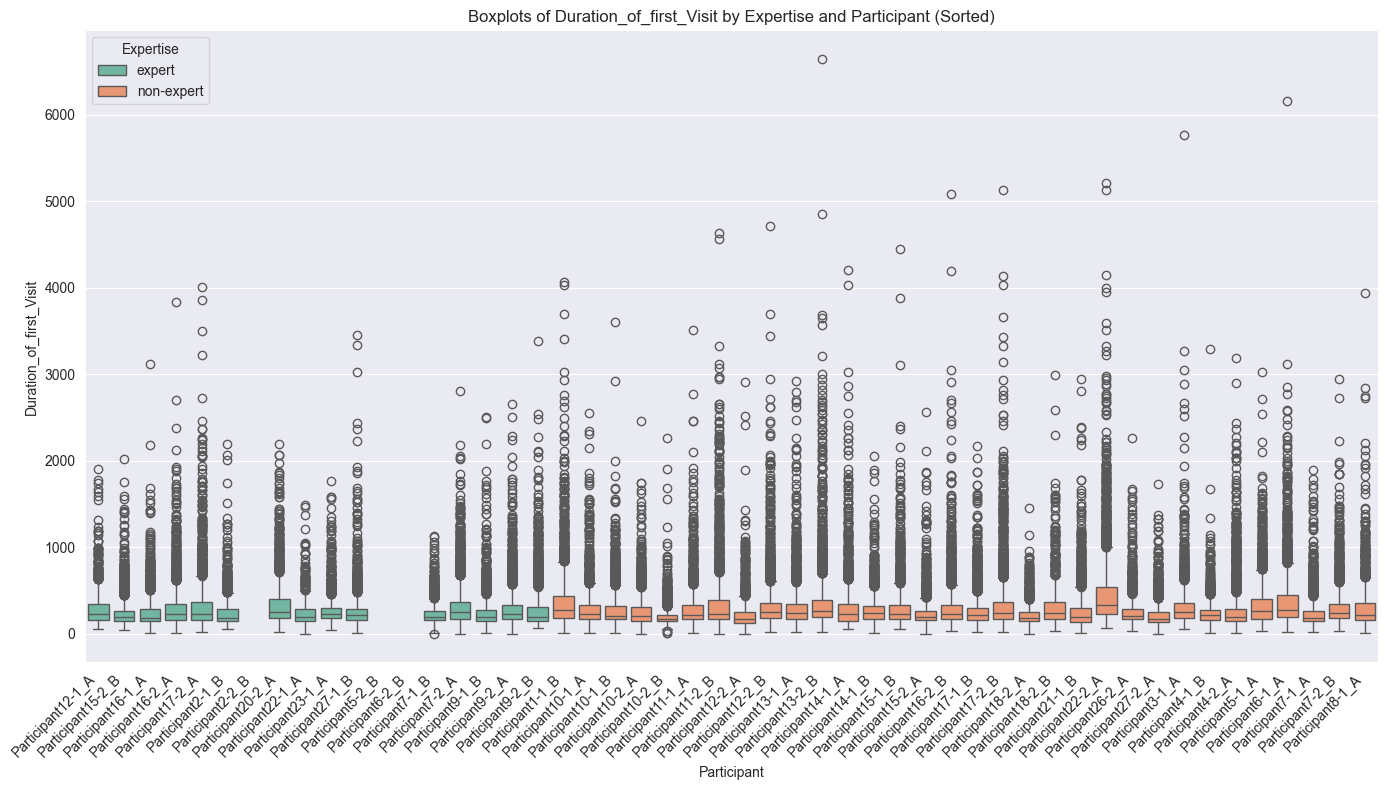



Column: Number_of_saccades_in_AOI
count    193908.000000
mean          0.621877
std          61.021905
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       15567.000000
Name: Number_of_saccades_in_AOI, dtype: float64


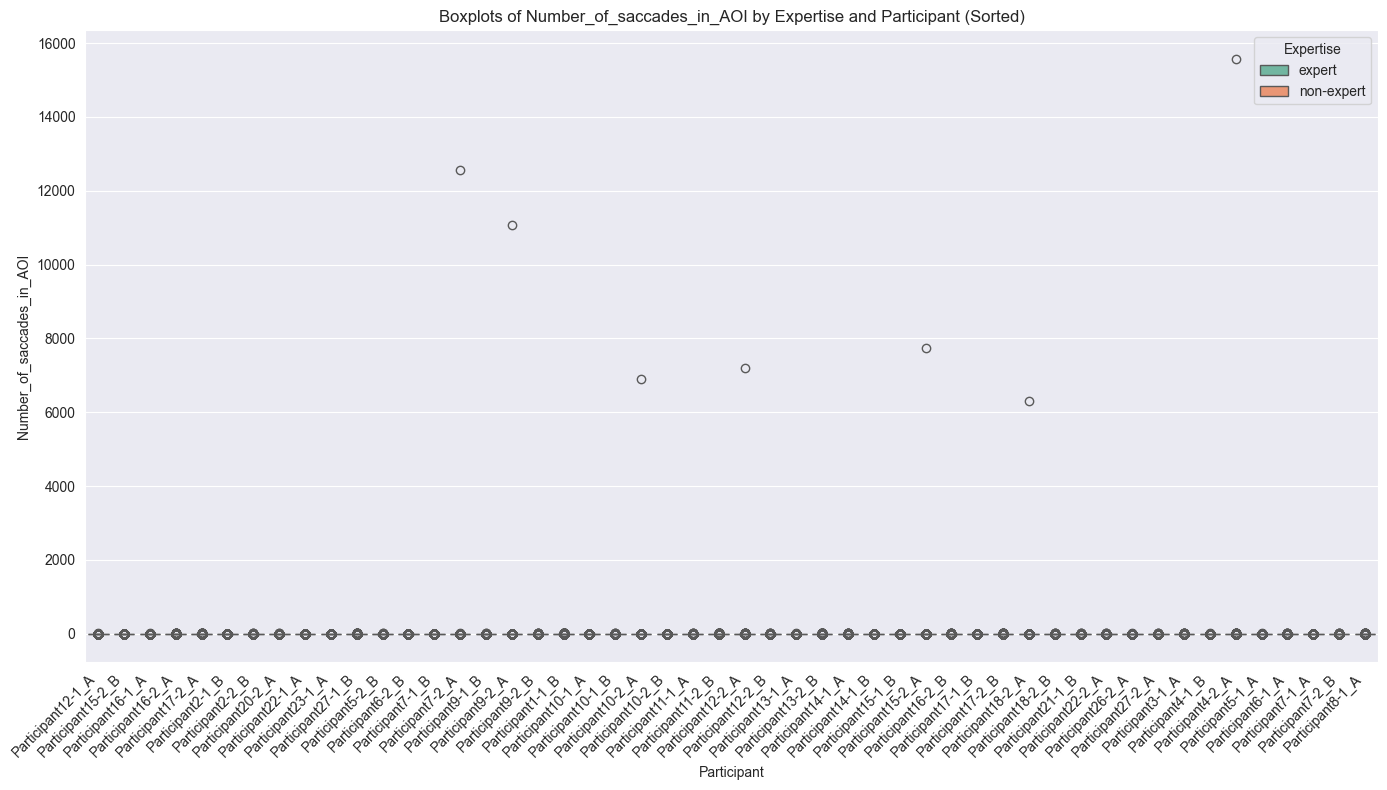



Column: Time_to_entry_saccade
count    122248.000000
mean      17261.699512
std       11870.009815
min           0.000000
25%        7880.000000
50%       15676.000000
75%       24480.000000
max      109619.000000
Name: Time_to_entry_saccade, dtype: float64


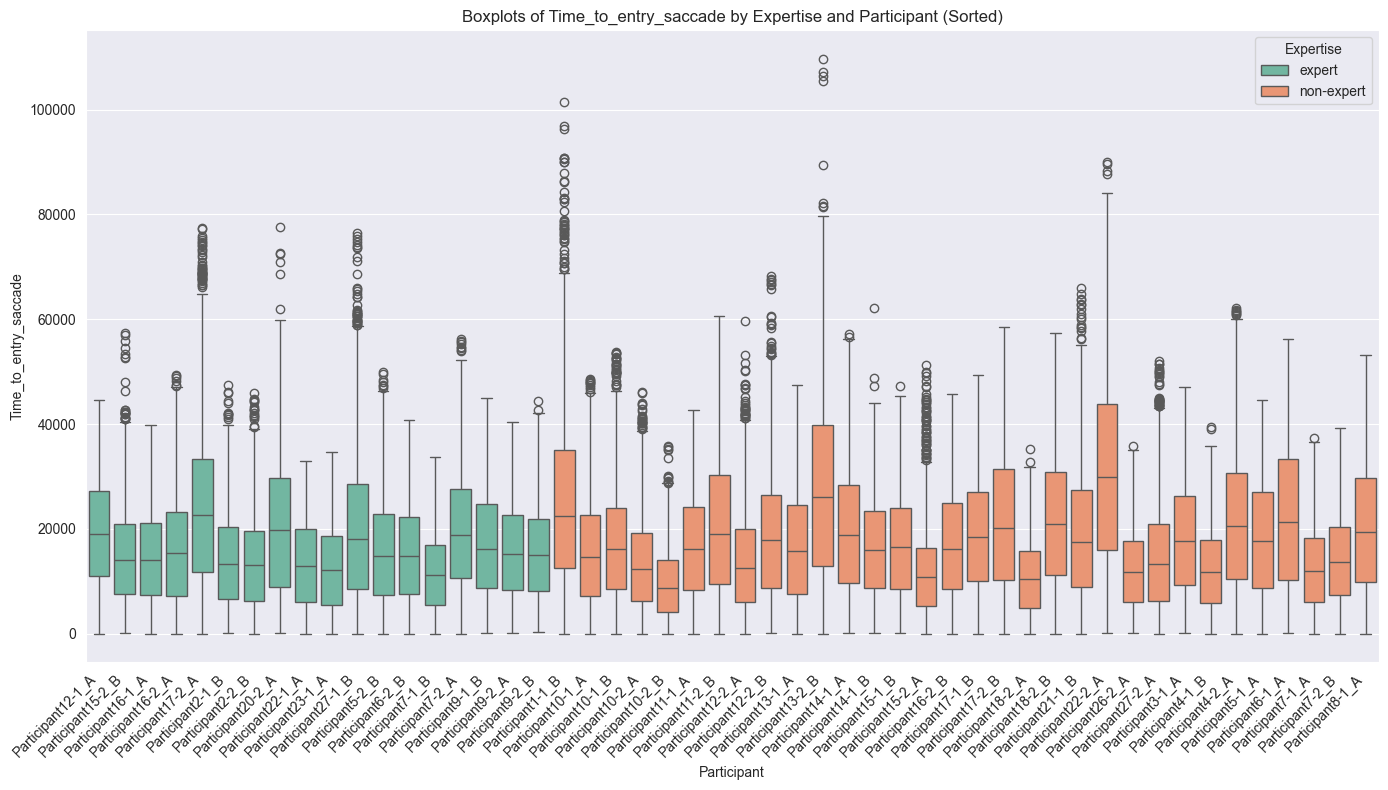



Column: Time_to_exit_saccade
count    121921.000000
mean      17422.948744
std       11951.508628
min           1.000000
25%        7991.000000
50%       15840.000000
75%       24692.000000
max      108441.000000
Name: Time_to_exit_saccade, dtype: float64


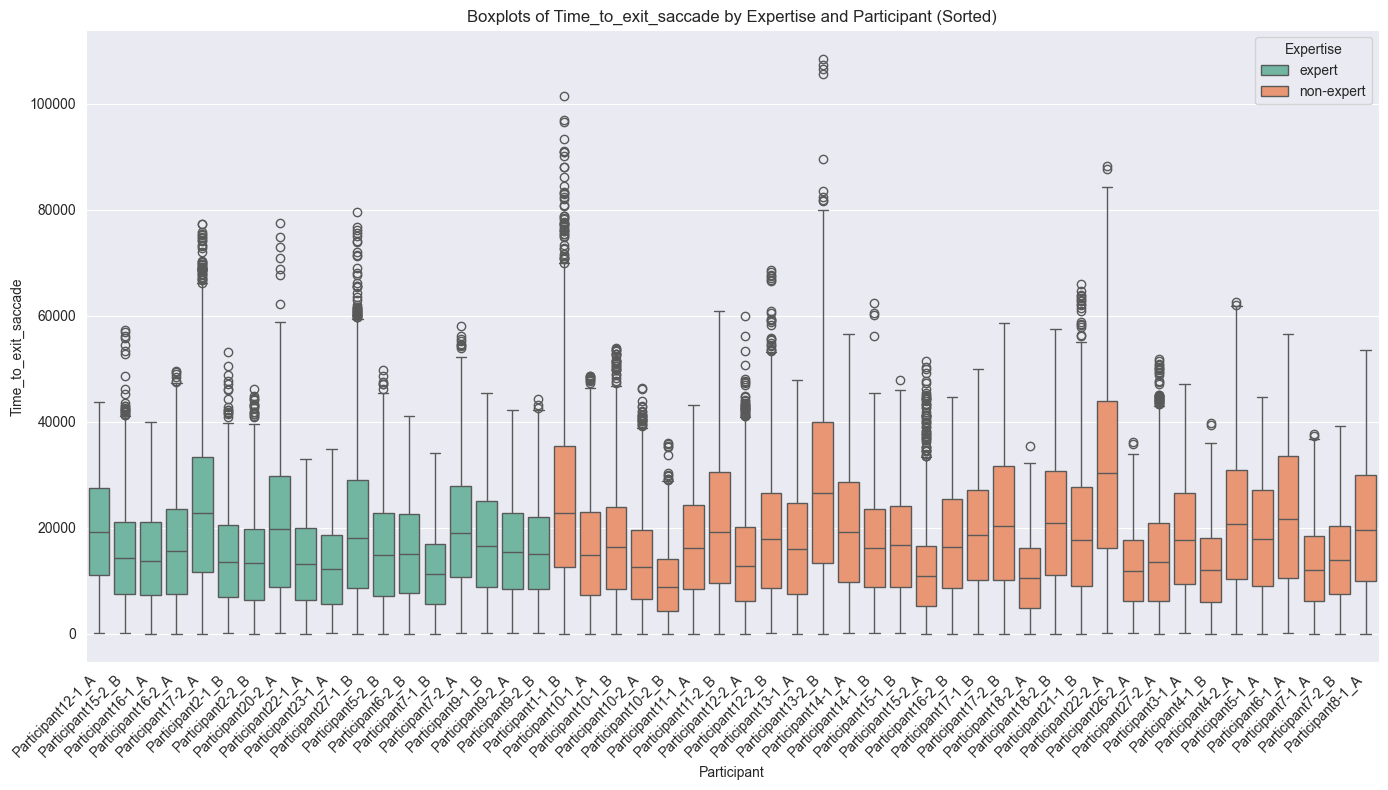



Column: Peak_velocity_of_entry_saccade
count    122248.000000
mean        249.632611
std         107.937485
min          30.100000
25%         176.450000
50%         235.550000
75%         299.600000
max         807.830000
Name: Peak_velocity_of_entry_saccade, dtype: float64


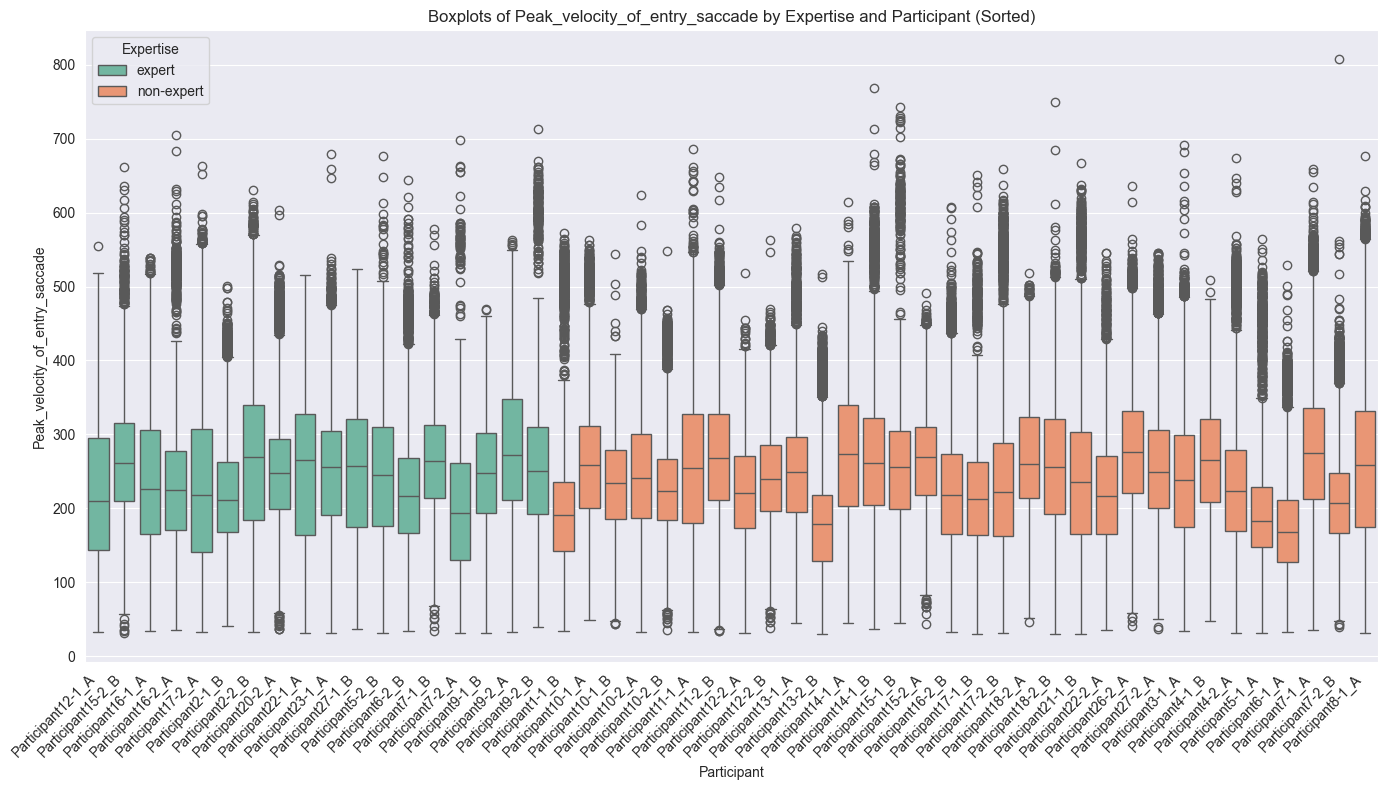



Column: Peak_velocity_of_exit_saccade
count    121921.000000
mean        247.083337
std         107.624066
min           0.000000
25%         173.740000
50%         232.100000
75%         297.210000
max         807.830000
Name: Peak_velocity_of_exit_saccade, dtype: float64


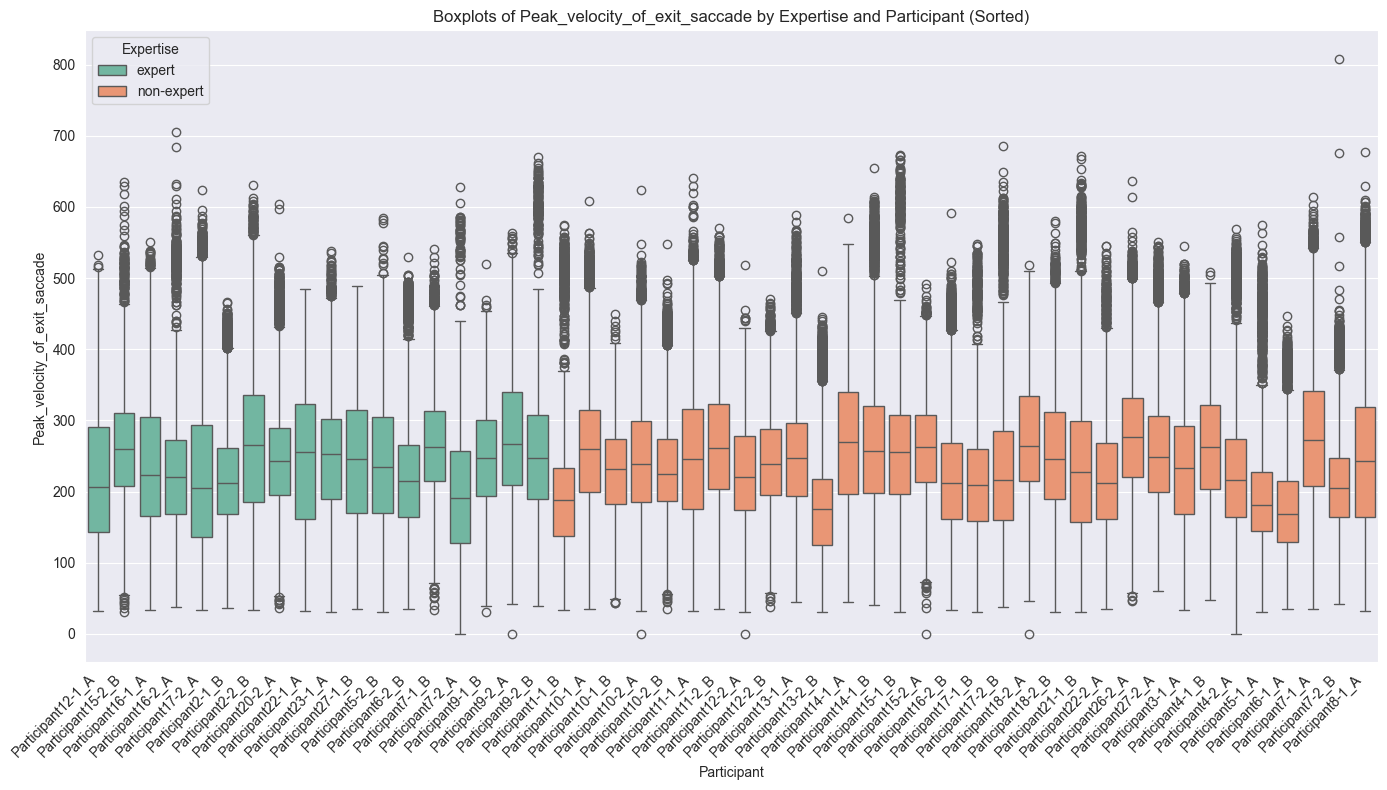



Column: First-pass_first_fixation_duration
count    192320.000000
mean         94.873742
std         121.825892
min           0.000000
25%           0.000000
50%           0.000000
75%         185.000000
max        1922.000000
Name: First-pass_first_fixation_duration, dtype: float64


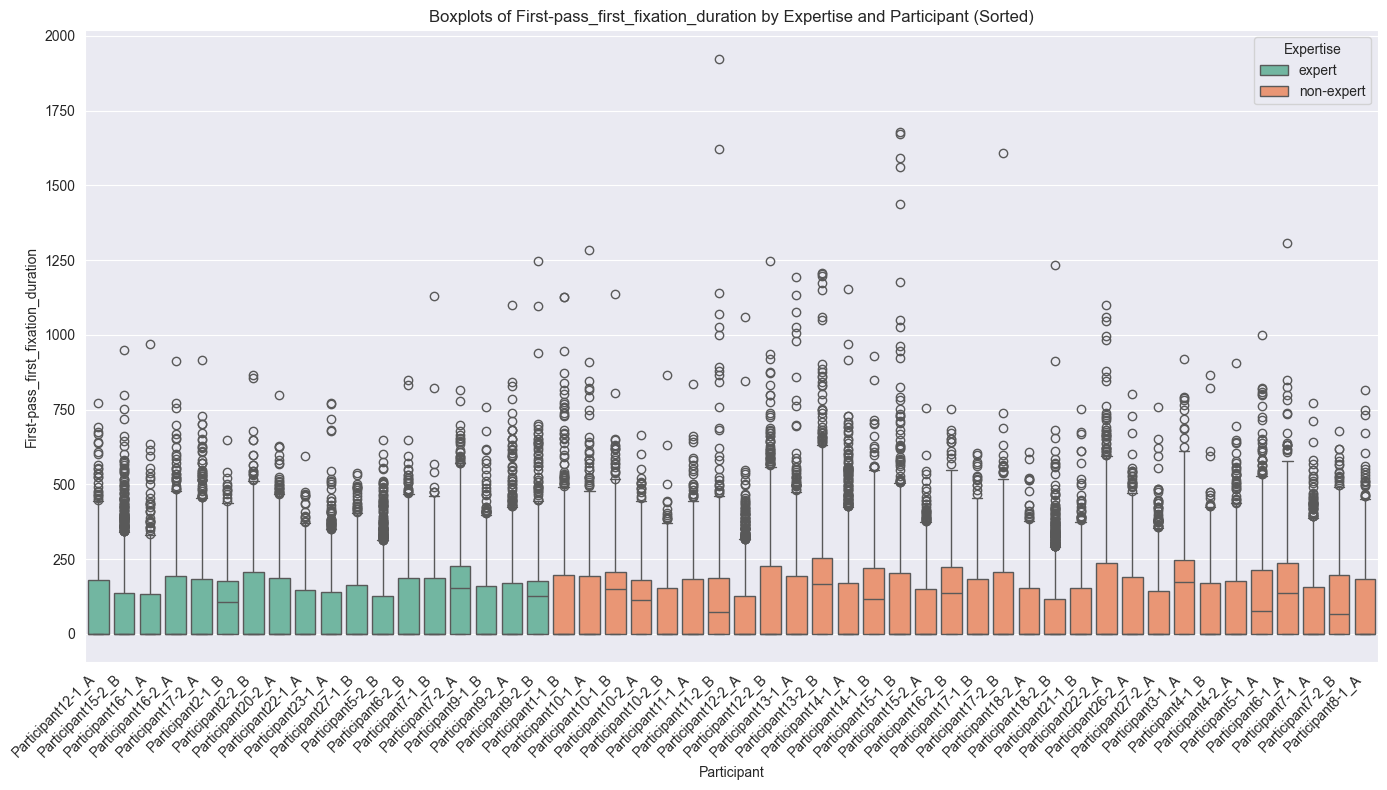



Column: First-pass_duration
count    192320.000000
mean        127.655179
std         209.007960
min           0.000000
25%           0.000000
50%           0.000000
75%         210.000000
max        5542.000000
Name: First-pass_duration, dtype: float64


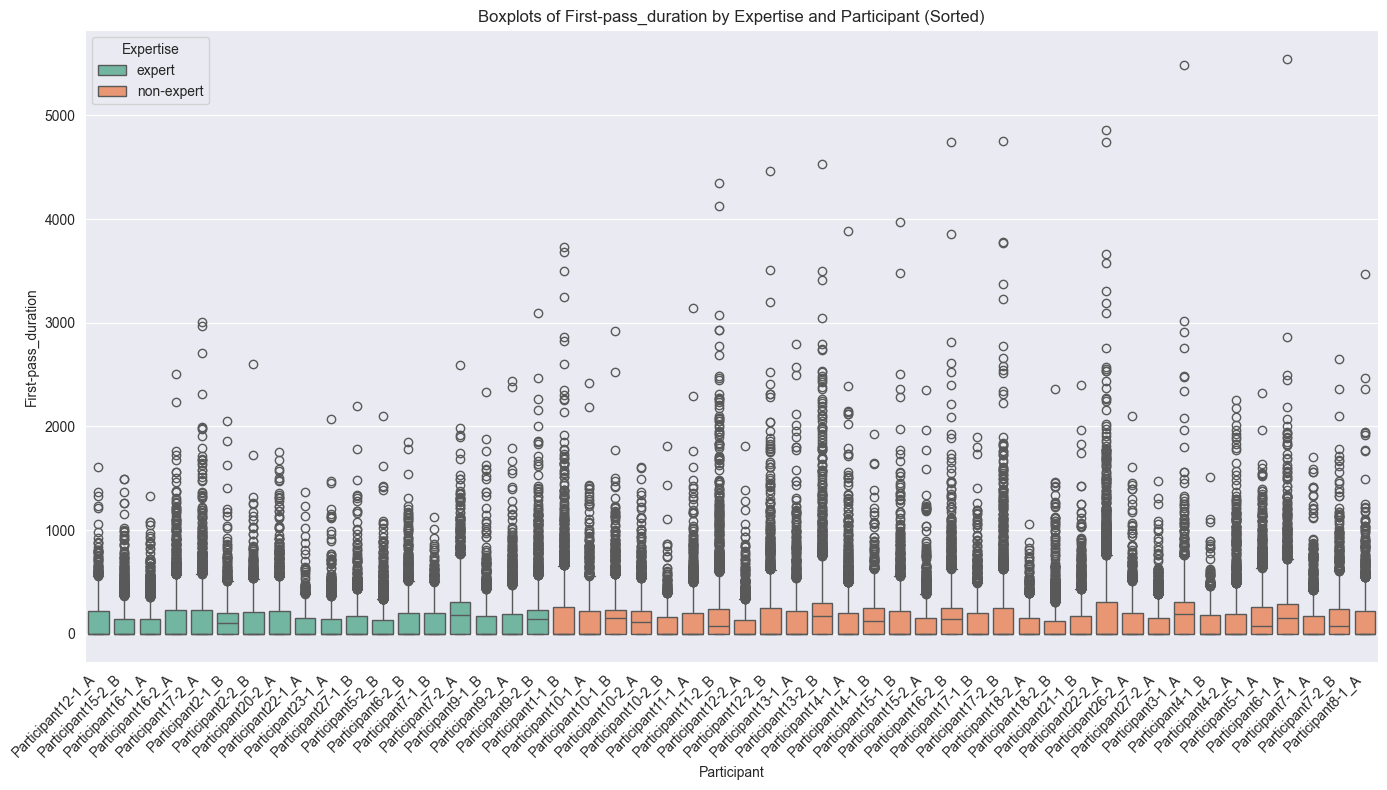



Column: Selective_regression-path_duration
count    145502.000000
mean        153.045456
std         250.315752
min           0.000000
25%           0.000000
50%           0.000000
75%         238.000000
max        5676.000000
Name: Selective_regression-path_duration, dtype: float64


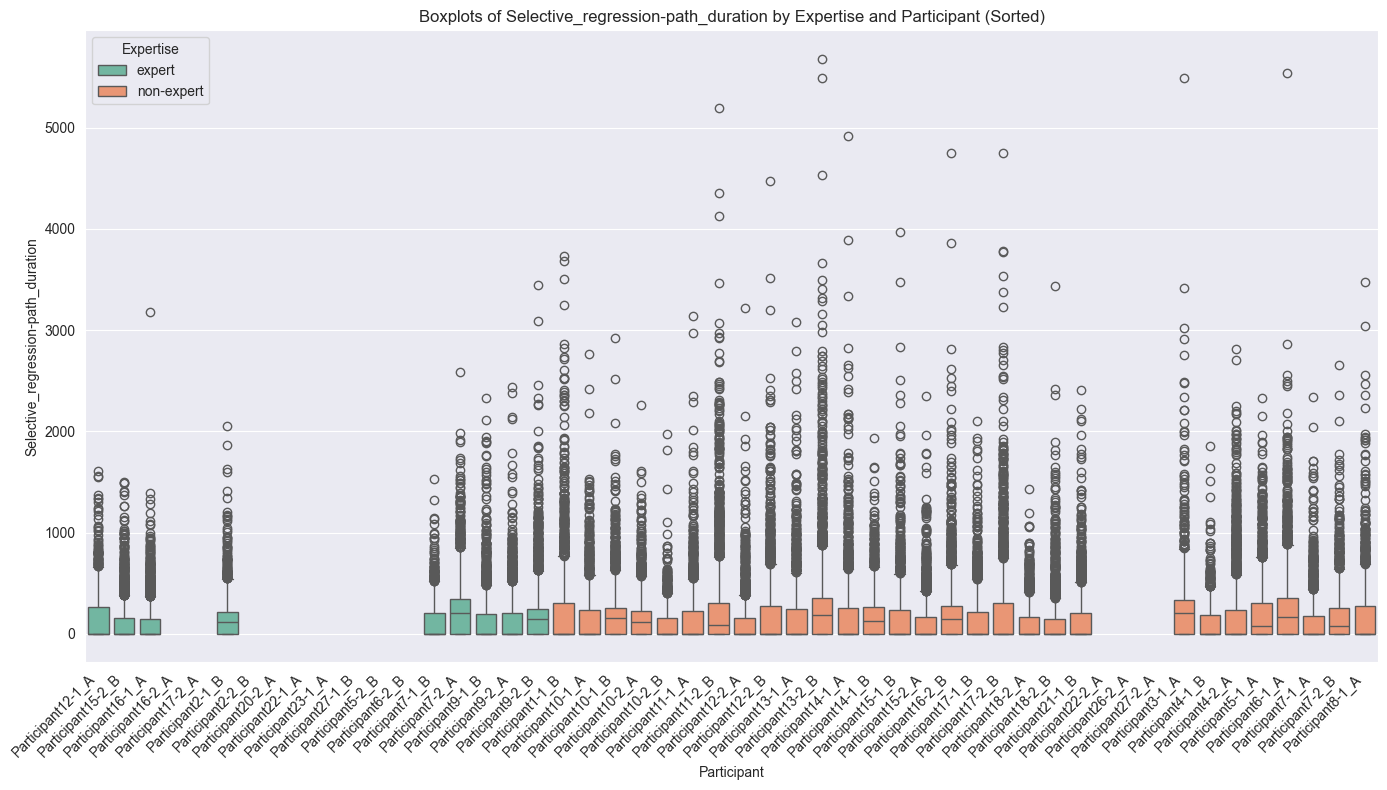



Column: First-pass_regression
count    85663.000000
mean         0.250622
std          0.433374
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: First-pass_regression, dtype: float64


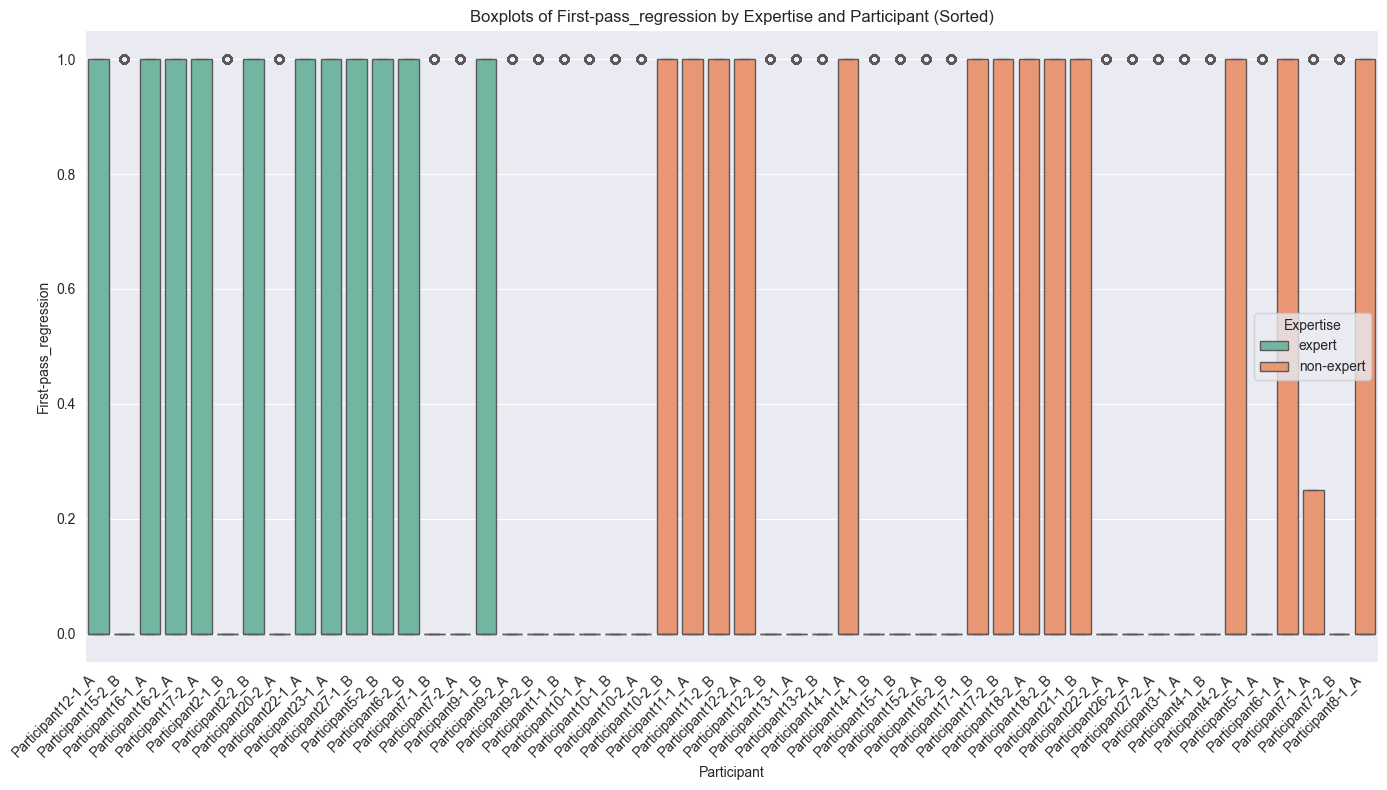



Column: Regression-path_duration
count    192320.000000
mean        277.914309
std        1214.187071
min           0.000000
25%           0.000000
50%           0.000000
75%         262.250000
max       61674.000000
Name: Regression-path_duration, dtype: float64


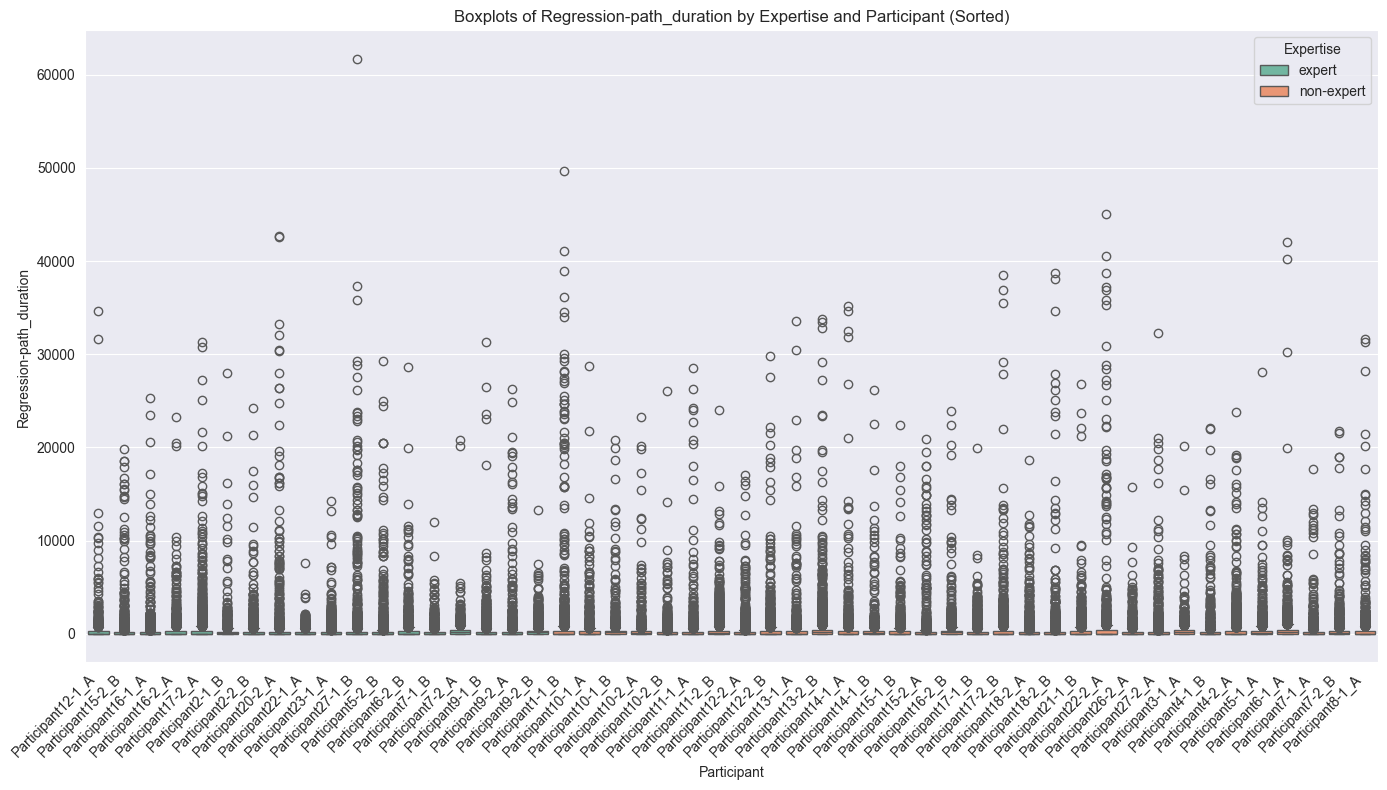



Column: Average_whole-fixation_eye_openness
count    46818.000000
mean       136.310351
std        241.861480
min          0.000000
25%          0.000000
50%          0.000000
75%        222.000000
max       4857.000000
Name: Average_whole-fixation_eye_openness, dtype: float64


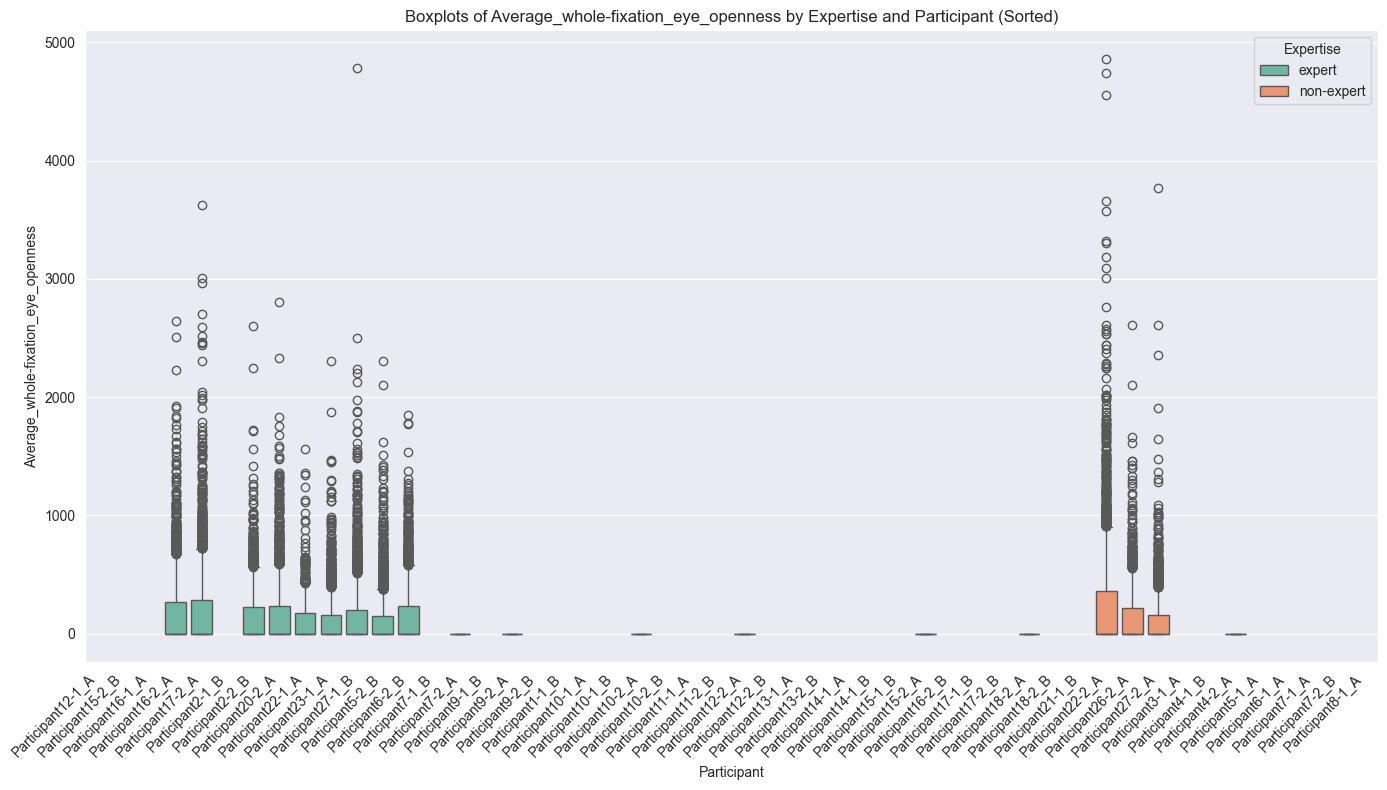

In [33]:
for column in numerical_columns:
    print(f"Column: {column}")
    print(data[column].describe())
    plot_fixation_boxplots_by_expertise_sorted(participant_dfs, column_name=column)
    print("\n")

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

# Example usage for text types:
for text_type, df in text_type_dfs.items():
    plot_scatter(df, 'Time_to_first_fixation', 'Average_duration_of_fixations', f'Time vs Duration for {text_type}')

# Example usage for participants:
for participant, df in participant_dfs.items():
    plot_scatter(df, 'Time_to_first_fixation', 'Average_duration_of_fixations', f'Time vs Duration for {participant}')

# Example usage for texts:
for text, df in text_dfs.items():
    plot_scatter(df, 'Time_to_first_fixation', 'Average_duration_of_fixations', f'Time vs Duration for {text}')

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scatter_by_expertise(df, x_column, y_column, title):
    """
    Plots a scatter plot differentiating experts and non-experts.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column for the x-axis.
        y_column (str): The name of the column for the y-axis.
        title (str): The title of the plot.
    """

    plt.figure(figsize=(10, 6))

    experts = df[df['is.expert'] == 'expert']
    non_experts = df[df['is.expert'] == 'non-expert']

    plt.scatter(experts[x_column], experts[y_column], alpha=0.5, label='Expert', color='blue')
    plt.scatter(non_experts[x_column], non_experts[y_column], alpha=0.5, label='Non-Expert', color='red')

    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.legend()  # Add legend to distinguish experts and non-experts
    plt.show()

# Example usage for text types:
for text_type, df in text_type_dfs.items():
    plot_scatter_by_expertise(df, 'Time_to_first_fixation', 'Average_duration_of_fixations', f'Time vs Duration for {text_type}')

NameError: name 'text_type_dfs' is not defined

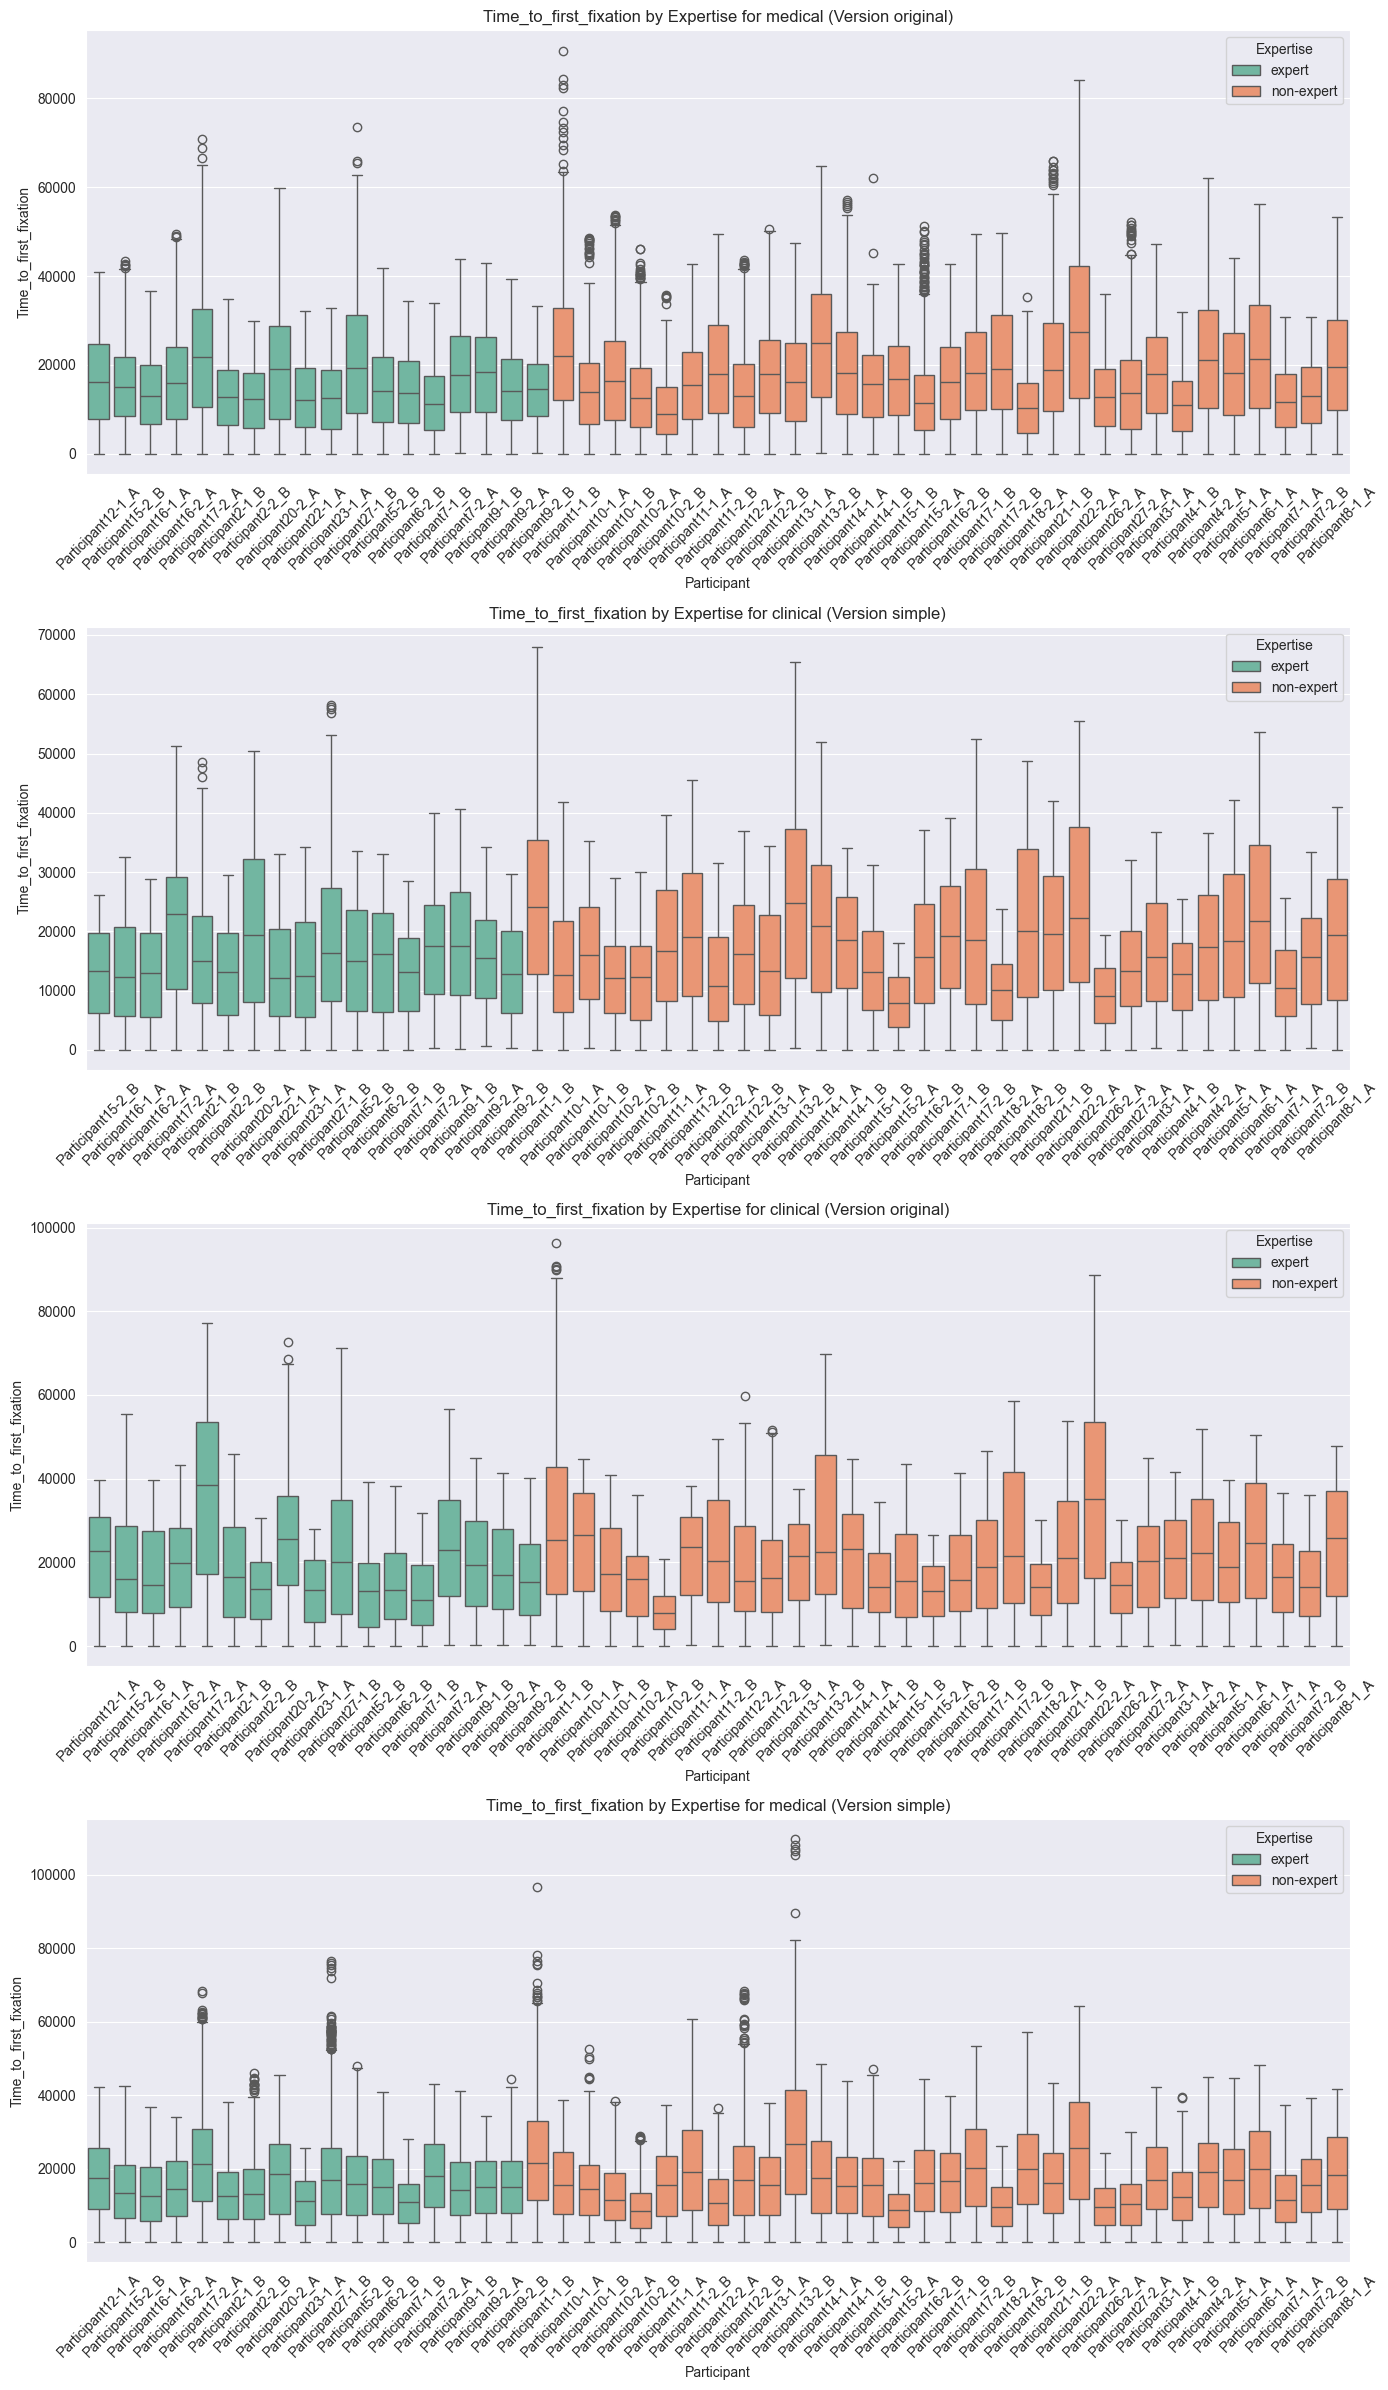

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_fixation_boxplots_by_expertise_sorted(text_type_version_dfs, column_name='Time_to_first_fixation'):
    """
    Plots boxplots of a specified column, grouped by expertise, with participants within each expertise group.
    Works with the dictionary of DataFrames created by create_text_type_version_dfs().

    Args:
        text_type_version_dfs (dict): A dictionary where keys are (text.type, text.version) tuples
                                     and values are pandas DataFrames.
        column_name (str): The name of the column to plot (e.g., 'Time_to_first_fixation').
    """
    # Create figure with subplots for each text type and version
    n_pairs = len(text_type_version_dfs)
    fig, axes = plt.subplots(n_pairs, 1, figsize=(14, 6*n_pairs))

    # Handle case where only one pair exists
    if n_pairs == 1:
        axes = [axes]

    for i, ((text_type, text_version), df) in enumerate(text_type_version_dfs.items()):
        if column_name in df.columns and 'is.expert' in df.columns and 'Participant_unique' in df.columns:
            # Sort the DataFrame by 'is.expert' and then 'Participant_unique'
            df_sorted = df.sort_values(by=['is.expert', 'Participant_unique'])

            # Create boxplot
            sns.boxplot(x='Participant_unique', y=column_name, hue='is.expert', data=df_sorted, palette='Set2', ax=axes[i])

            axes[i].set_title(f'{column_name} by Expertise for {text_type} (Version {text_version})')
            axes[i].set_xlabel('Participant')
            axes[i].set_ylabel(column_name)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend(title='Expertise') # Add legend
        else:
            missing_cols = []
            if column_name not in df.columns:
                missing_cols.append(column_name)
            if 'is.expert' not in df.columns:
                missing_cols.append('is.expert')
            if 'Participant_unique' not in df.columns:
                missing_cols.append('Participant_unique')

            axes[i].text(0.5, 0.5, f"Missing required columns: {', '.join(missing_cols)}",
                        ha='center', va='center')
            axes[i].set_title(f"Cannot plot {text_type} (Version {text_version})")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_fixation_boxplots_by_expertise_sorted(text_type_version_dfs, column_name='Time_to_first_fixation')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('ETdata__for_.csv', delimiter="\t", low_memory=False)

average_data = data.groupby(['Participant_unique', 'text.type', 'text.version'])['Time_to_first_fixation'].mean().reset_index()

def visualize_participant_data(participant_id, participant_data):
    pivot_data = participant_data.pivot(index='text.type', columns='text.version', values='Time_to_first_fixation')

    if 'original' in pivot_data.columns and 'simple' in pivot_data.columns:
        pivot_data['Differenz'] = pivot_data['original'] - pivot_data['simple']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.barplot(x='text.type', y='Time_to_first_fixation', hue='text.version', data=participant_data, ax=ax1)
    ax1.set_title(f'Durchschnittliche Time_to_first_fixation für Teilnehmer {participant_id}')
    ax1.set_xlabel('Texttyp')
    ax1.set_ylabel('Durchschnitt Time_to_first_fixation')

    if 'Differenz' in pivot_data.columns:
        pivot_data['Differenz'].plot(kind='bar', ax=ax2, color='skyblue')
        ax2.set_title(f'Änderung von einfacher zu ursprünglicher Version für Teilnehmer {participant_id}')
        ax2.set_xlabel('Texttyp')
        ax2.set_ylabel('Differenz in Time_to_first_fixation (Original - Simple)')
        ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
    else:
        ax2.text(0.5, 0.5, "Differenz kann nicht berechnet werden, da nicht beide Versionen vorliegen.", ha='center', va='center')

    plt.tight_layout()
    plt.show()

for participant_id, participant_data in average_data.groupby('Participant_unique'):
    visualize_participant_data(participant_id, participant_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Needed for custom legend
import seaborn as sns

# Daten laden
try:
    data = pd.read_csv('ETdata__for_.csv', delimiter="\t", low_memory=False)
except FileNotFoundError:
    print("Error: 'ETdata__for_.csv' not found. Please ensure the file is in the correct directory.")
    exit()
except KeyError:
    print("Error: Make sure the delimiter is correct (tab-separated: '\\t'). Check the CSV file.")
    exit()

# Check if 'is.expert' column exists
if 'is.expert' not in data.columns:
    print("Error: 'is.expert' column not found in the data.")
    print("Please ensure your CSV file contains the 'is.expert' column with values like 'expert' and 'non-expert'.")
    exit()

# Extrahiere Expertise-Mapping (Participant -> Expertise)
try:
    expertise_mapping = data[['Participant_unique', 'is.expert']].drop_duplicates().set_index('Participant_unique')['is.expert']
except KeyError:
    print("Error: Could not find 'Participant_unique' or 'is.expert' column. Check column names in your CSV.")
    exit()

# Gruppieren nach Teilnehmer, Texttyp und Version, Durchschnitt berechnen
average_data = data.groupby(['Participant_unique', 'text.type', 'text.version'])['Time_to_first_fixation'].mean().reset_index()

# Pivot-Tabelle für die Differenzberechnung
pivot_data_all = average_data.pivot_table(index=['Participant_unique', 'text.type'], columns='text.version', values='Time_to_first_fixation').reset_index()
pivot_data_all['Differenz'] = pivot_data_all['original'] - pivot_data_all['simple']

# Merge Expertise in die Pivot-Tabelle
pivot_data_all['Expertise_Level'] = pivot_data_all['Participant_unique'].map(expertise_mapping)

# Check if merge was successful
if pivot_data_all['Expertise_Level'].isnull().any():
    print("Warning: Some participants could not be mapped to an expertise level. Check your data.")
    pivot_data_all['Expertise_Level'].fillna('unknown', inplace=True)


# --- Define Expertise Colors ---
expertise_colors_dict = {'expert': 'skyblue', 'non-expert': 'salmon'}
if 'unknown' in pivot_data_all['Expertise_Level'].unique():
    expertise_colors_dict['unknown'] = 'lightgrey'


# --- Create Participant-to-Color Mapping ---
participant_color_map = {
    participant: expertise_colors_dict.get(expertise, 'gray')
    for participant, expertise in pivot_data_all.set_index('Participant_unique')['Expertise_Level'].items()
}
all_participants_in_pivot = pivot_data_all['Participant_unique'].unique()
final_participant_palette = {p: participant_color_map.get(p, 'gray') for p in all_participants_in_pivot}


# --- Determine Sorting Order for Participants ---
# Create a DataFrame with unique participants and their expertise
participant_expertise = pivot_data_all[['Participant_unique', 'Expertise_Level']].drop_duplicates()

# Define the desired order for expertise levels
expertise_order = ['expert', 'non-expert']
if 'unknown' in participant_expertise['Expertise_Level'].unique():
    expertise_order.append('unknown') # Append unknown if it exists

# Convert Expertise_Level to a categorical type with the defined order
participant_expertise['Expertise_Level'] = pd.Categorical(
    participant_expertise['Expertise_Level'],
    categories=expertise_order,
    ordered=True
)

# Sort participants: first by expertise (expert -> non-expert), then by ID
sorted_participants = participant_expertise.sort_values(
    by=['Expertise_Level', 'Participant_unique']
)['Participant_unique'].tolist()


# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# --- Plot 1: Balkendiagramm (unverändert) ---
sns.barplot(x='text.type', y='Time_to_first_fixation', hue='text.version', data=average_data, ax=ax1, errorbar='sd')
ax1.set_title('Durchschnittliche Time_to_first_fixation nach Texttyp und Version')
ax1.set_xlabel('Texttyp')
ax1.set_ylabel('Durchschnitt Time_to_first_fixation (ms)')
ax1.legend(title='Textversion')

# --- Plot 2: Differenzdiagramm (Sorted, Individual Bars, Colored by Expertise) ---
sns.barplot(
    x='text.type',
    y='Differenz',
    hue='Participant_unique',       # Hue by participant
    hue_order=sorted_participants,  # Apply the custom sort order
    data=pivot_data_all,
    palette=final_participant_palette, # Apply the custom participant->color map
    ax=ax2,
    dodge=True
)
ax2.set_title('Differenz der Time_to_first_fixation (Original - Simple) pro Teilnehmer (Sortiert nach Expertise)')
ax2.set_xlabel('Texttyp')
ax2.set_ylabel('Differenz in Time_to_first_fixation (ms)')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')

# --- Create Custom Legend for Expertise ---
ax2.get_legend().remove()
legend_patches = [mpatches.Patch(color=color, label=level) for level, color in expertise_colors_dict.items() if level in pivot_data_all['Expertise_Level'].unique()]
ax2.legend(handles=legend_patches, title='Expertise', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Needed for custom legend
import seaborn as sns

# --- Configuration ---
csv_file_path         = 'ETdata__for_.csv'
measure_column_name   = 'Time_to_first_fixation'
expertise_column_name = 'is.expert'
expert_value          = 'expert'
non_expert_value      = 'non-expert'
participant_id_column = 'Participant_unique'
text_type_column      = 'text.type'
text_version_column   = 'text.version'
original_version_value= 'original'
simple_version_value  = 'simple'

# Colors for visualization
expert_color          = 'skyblue'
non_expert_color      = 'salmon'
unknown_color         = 'lightgrey'
# -------------------

try:
    data = pd.read_csv(csv_file_path, delimiter="\t", low_memory=False)
except FileNotFoundError:
    print(f"Error: '{csv_file_path}' not found. Please ensure the file path is correct.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    print("Please check the file path, delimiter, and file integrity.")
    exit()

# --- Validate Input Columns ---
required_columns = [
    measure_column_name,
    expertise_column_name,
    participant_id_column,
    text_type_column,
    text_version_column
]
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Error: The following required columns are missing from the CSV file: {', '.join(missing_columns)}")
    print(f"Please check the column names in the file '{csv_file_path}' and update the configuration section.")
    exit()

# Check if specific version values exist
version_values = data[text_version_column].unique()
if original_version_value not in version_values or simple_version_value not in version_values:
     print(f"Error: The '{text_version_column}' column must contain both '{original_version_value}' and '{simple_version_value}' values.")
     print(f"Found values: {version_values}")
     exit()


# Extrahiere Expertise-Mapping (Participant -> Expertise)
try:
    expertise_mapping = data[[participant_id_column, expertise_column_name]].drop_duplicates().set_index(participant_id_column)[expertise_column_name]
except KeyError:
    # This check might be redundant due to the validation above, but kept for safety
    print(f"Error: Could not find '{participant_id_column}' or '{expertise_column_name}' column during expertise mapping.")
    exit()

# Gruppieren nach Teilnehmer, Texttyp und Version, Durchschnitt berechnen for the selected measure
average_data = data.groupby([participant_id_column, text_type_column, text_version_column])[measure_column_name].mean().reset_index()

# Pivot-Tabelle für die Differenzberechnung for the selected measure
pivot_data_all = average_data.pivot_table(
    index=[participant_id_column, text_type_column],
    columns=text_version_column,
    values=measure_column_name
).reset_index()

# Check if both original and simple columns exist after pivot
if original_version_value not in pivot_data_all.columns or simple_version_value not in pivot_data_all.columns:
    print(f"Error: Could not create '{original_version_value}' and '{simple_version_value}' columns after pivoting.")
    print("This might happen if some participants are missing data for one text version.")
    # Handle missing data, e.g., by filling NaNs *before* the pivot or checking data completeness.
    # For now, we will exit.
    print("Pivot table columns:", pivot_data_all.columns)
    exit()


# Calculate difference using the specified version values
pivot_data_all['Differenz'] = pivot_data_all[original_version_value] - pivot_data_all[simple_version_value]

# Merge Expertise in die Pivot-Tabelle
pivot_data_all['Expertise_Level'] = pivot_data_all[participant_id_column].map(expertise_mapping)

# Check if merge was successful and handle potential unknown expertise values
unknown_expertise_value = 'unknown' # Define a value for unknown expertise
if pivot_data_all['Expertise_Level'].isnull().any():
    print("Warning: Some participants could not be mapped to an expertise level. Check your data.")
    pivot_data_all['Expertise_Level'].fillna(unknown_expertise_value, inplace=True)

# Check if the specified expert/non-expert values actually exist
found_expertise_values = pivot_data_all['Expertise_Level'].unique()
if expert_value not in found_expertise_values:
    print(f"Warning: The specified expert value '{expert_value}' was not found in the '{expertise_column_name}' column. Found values: {found_expertise_values}")
if non_expert_value not in found_expertise_values:
     print(f"Warning: The specified non-expert value '{non_expert_value}' was not found in the '{expertise_column_name}' column. Found values: {found_expertise_values}")


# --- Define Expertise Colors ---
expertise_colors_dict = {
    expert_value: expert_color,
    non_expert_value: non_expert_color
}
if unknown_expertise_value in found_expertise_values:
    expertise_colors_dict[unknown_expertise_value] = unknown_color


# --- Create Participant-to-Color Mapping ---
participant_color_map = {
    participant: expertise_colors_dict.get(expertise, unknown_color) # Default to unknown color
    for participant, expertise in pivot_data_all.set_index(participant_id_column)['Expertise_Level'].items()
}
all_participants_in_pivot = pivot_data_all[participant_id_column].unique()
final_participant_palette = {p: participant_color_map.get(p, unknown_color) for p in all_participants_in_pivot}


# --- Determine Sorting Order for Participants ---
participant_expertise_df = pivot_data_all[[participant_id_column, 'Expertise_Level']].drop_duplicates()
# Define the desired order for expertise levels based on the configuration
expertise_order = [expert_value, non_expert_value]
if unknown_expertise_value in participant_expertise_df['Expertise_Level'].unique():
    expertise_order.append(unknown_expertise_value)

# Filter out any unexpected expertise values before creating categorical type
valid_expertise = participant_expertise_df[participant_expertise_df['Expertise_Level'].isin(expertise_order)].copy()
valid_expertise['Expertise_Level'] = pd.Categorical(
    valid_expertise['Expertise_Level'],
    categories=expertise_order,
    ordered=True
)
# Sort participants: first by expertise, then by ID
sorted_participants = valid_expertise.sort_values(
    by=['Expertise_Level', participant_id_column]
)[participant_id_column].tolist()


# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.suptitle(f"Analysis of '{measure_column_name}'", fontsize=16) # Add overall title

# --- Plot 1: Average Measure ---
sns.barplot(
    x=text_type_column,
    y=measure_column_name,
    hue=text_version_column,
    data=average_data,
    ax=ax1,
    errorbar='sd'
)
ax1.set_title(f'Average {measure_column_name} by Text Type and Version')
ax1.set_xlabel('Text Type')
ax1.set_ylabel(f'Average {measure_column_name}')
ax1.legend(title='Text Version')

# --- Plot 2: Difference Measure (Sorted, Individual Bars, Colored by Expertise) ---
sns.barplot(
    x=text_type_column,
    y='Differenz',
    hue=participant_id_column,
    hue_order=sorted_participants,  # Apply the custom sort order
    data=pivot_data_all,
    palette=final_participant_palette, # Apply the custom participant->color map
    ax=ax2,
    dodge=True
)
ax2.set_title(f'Difference in {measure_column_name} ({original_version_value} - {simple_version_value}) per Participant')
ax2.set_xlabel('Text Type')
ax2.set_ylabel(f'Difference in {measure_column_name}')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')

# --- Create Custom Legend for Expertise ---
ax2.get_legend().remove()
# Create legend handles only for expertise levels actually present and configured
legend_patches = [
    mpatches.Patch(color=color, label=level)
    for level, color in expertise_colors_dict.items() if level in pivot_data_all['Expertise_Level'].unique()
]
ax2.legend(handles=legend_patches, title='Expertise', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 0.95, 0.95]) # Adjust layout slightly for main title and legend
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

def analyze_and_plot_eye_tracking_data(
    csv_file_path,
    measure_column_name,
    expertise_column_name='is.expert',
    expert_value='expert',
    non_expert_value='non-expert',
    participant_id_column='Participant_unique',
    text_type_column='text.type',
    text_version_column='text.version',
    original_version_value='original',
    simple_version_value='simple',
    expert_color='skyblue',
    non_expert_color='salmon',
    unknown_color='lightgrey'
):
    """
    Analyzes eye-tracking data from a CSV file, calculates differences between text versions,
    and generates plots comparing expert and non-expert groups.

    Args:
        csv_file_path (str): Path to the CSV file.
        measure_column_name (str): Name of the column containing the measure to analyze.
        expertise_column_name (str, optional): Name of the column containing expertise information. Defaults to 'is.expert'.
        expert_value (str, optional): Value representing experts in the expertise column. Defaults to 'expert'.
        non_expert_value (str, optional): Value representing non-experts. Defaults to 'non-expert'.
        participant_id_column (str, optional): Name of the column containing participant IDs. Defaults to 'Participant_unique'.
        text_type_column (str, optional): Name of the column containing text types. Defaults to 'text.type'.
        text_version_column (str, optional): Name of the column containing text versions. Defaults to 'text.version'.
        original_version_value (str, optional): Value representing the original text version. Defaults to 'original'.
        simple_version_value (str, optional): Value representing the simple text version. Defaults to 'simple'.
        expert_color (str, optional): Color for experts in plots. Defaults to 'skyblue'.
        non_expert_color (str, optional): Color for non-experts in plots. Defaults to 'salmon'.
        unknown_color (str, optional): Color for unknown expertise in plots. Defaults to 'lightgrey'.
    """

    try:
        data = replaced
    except FileNotFoundError:
        print(f"Error: '{csv_file_path}' not found. Please ensure the file path is correct.")
        return
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        print("Please check the file path, delimiter, and file integrity.")
        return

    required_columns = [
        measure_column_name,
        expertise_column_name,
        participant_id_column,
        text_type_column,
        text_version_column
    ]
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        print(f"Error: The following required columns are missing from the CSV file: {', '.join(missing_columns)}")
        print(f"Please check the column names in the file '{csv_file_path}' and update the configuration section.")
        return

    version_values = data[text_version_column].unique()
    if original_version_value not in version_values or simple_version_value not in version_values:
        print(f"Error: The '{text_version_column}' column must contain both '{original_version_value}' and '{simple_version_value}' values.")
        print(f"Found values: {version_values}")
        return

    try:
        expertise_mapping = data[[participant_id_column, expertise_column_name]].drop_duplicates().set_index(participant_id_column)[expertise_column_name]
    except KeyError:
        print(f"Error: Could not find '{participant_id_column}' or '{expertise_column_name}' column during expertise mapping.")
        return

    average_data = data.groupby([participant_id_column, text_type_column, text_version_column])[measure_column_name].mean().reset_index()

    pivot_data_all = average_data.pivot_table(
        index=[participant_id_column, text_type_column],
        columns=text_version_column,
        values=measure_column_name
    ).reset_index()

    if original_version_value not in pivot_data_all.columns or simple_version_value not in pivot_data_all.columns:
        print(f"Error: Could not create '{original_version_value}' and '{simple_version_value}' columns after pivoting.")
        print("This might happen if some participants are missing data for one text version.")
        print("Pivot table columns:", pivot_data_all.columns)
        return

    pivot_data_all['Differenz'] = pivot_data_all[original_version_value] - pivot_data_all[simple_version_value]
    pivot_data_all['Expertise_Level'] = pivot_data_all[participant_id_column].map(expertise_mapping)

    unknown_expertise_value = 'unknown'
    if pivot_data_all['Expertise_Level'].isnull().any():
        print("Warning: Some participants could not be mapped to an expertise level. Check your data.")
        pivot_data_all['Expertise_Level'].fillna(unknown_expertise_value, inplace=True)

    found_expertise_values = pivot_data_all['Expertise_Level'].unique()
    if expert_value not in found_expertise_values:
        print(f"Warning: The specified expert value '{expert_value}' was not found in the '{expertise_column_name}' column. Found values: {found_expertise_values}")
    if non_expert_value not in found_expertise_values:
        print(f"Warning: The specified non-expert value '{non_expert_value}' was not found in the '{expertise_column_name}' column. Found values: {found_expertise_values}")

    expertise_colors_dict = {
        expert_value: expert_color,
        non_expert_value: non_expert_color
    }
    if unknown_expertise_value in found_expertise_values:
        expertise_colors_dict[unknown_expertise_value] = unknown_color

    participant_color_map = {
        participant: expertise_colors_dict.get(expertise, unknown_color)
        for participant, expertise in pivot_data_all.set_index(participant_id_column)['Expertise_Level'].items()
    }
    all_participants_in_pivot = pivot_data_all[participant_id_column].unique()
    final_participant_palette = {p: participant_color_map.get(p, unknown_color) for p in all_participants_in_pivot}

    participant_expertise_df = pivot_data_all[[participant_id_column, 'Expertise_Level']].drop_duplicates()
    expertise_order = [expert_value, non_expert_value]
    if unknown_expertise_value in participant_expertise_df['Expertise_Level'].unique():
        expertise_order.append(unknown_expertise_value)

    valid_expertise = participant_expertise_df[participant_expertise_df['Expertise_Level'].isin(expertise_order)].copy()
    valid_expertise['Expertise_Level'] = pd.Categorical(
        valid_expertise['Expertise_Level'],
        categories=expertise_order,
        ordered=True
    )
    sorted_participants = valid_expertise.sort_values(
        by=['Expertise_Level', participant_id_column]
    )[participant_id_column].tolist()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
    fig.suptitle(f"Analysis of '{measure_column_name}'", fontsize=16)

    sns.barplot(
        x=text_type_column,
        y=measure_column_name,
        hue=text_version_column,
        data=average_data,
        ax=ax1,
        errorbar='sd'
    )
    ax1.set_title(f'Average {measure_column_name} by Text Type and Version')
    ax1.set_xlabel('Text Type')
    ax1.set_ylabel(f'Average {measure_column_name}')
    ax1.legend(title='Text Version')

    sns.barplot(
        x=text_type_column,
        y='Differenz',
        hue=participant_id_column,
        hue_order=sorted_participants,
        data=pivot_data_all,
        palette=final_participant_palette,
        ax=ax2,
        dodge=True
    )
    ax2.set_title(f'Difference in {measure_column_name} ({original_version_value} - {simple_version_value}) per Participant')
    ax2.set_xlabel('Text Type')
    ax2.set_ylabel(f'Difference in {measure_column_name}')
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')

    ax2.get_legend().remove()
    legend_patches = [
        mpatches.Patch(color=color, label=level)
        for level, color in expertise_colors_dict.items() if level in pivot_data_all['Expertise_Level'].unique()
    ]
    ax2.legend(handles=legend_patches, title='Expertise', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])
    plt.show()

In [17]:
analyze_and_plot_eye_tracking_data('ETdata__for_.csv', 'Re-reading_duration')

TypeError: agg function failed [how->mean,dtype->object]

In [8]:
def get_top_n_values(df, column_name, n=10):
  """
  Extracts the top n maximum entries from a specified column of a pandas DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to extract the maximum values from.
    n (int): The number of top maximum values to extract. Defaults to 10.

  Returns:
    pd.Series: A pandas Series containing the top n maximum values, sorted in descending order.
    Returns None if the column does not exist.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None

  top_n = df[column_name].nlargest(n)
  return top_n
get_top_n_values(data, 'First-pass_duration')

33087     5542.0
27047     5487.0
115460    4857.0
169441    4752.0
164991    4745.0
117411    4740.0
153828    4533.0
151641    4468.0
142925    4352.0
145155    4128.0
Name: First-pass_duration, dtype: float64

In [ ]:
def replace_na_with_zero(df, column_name):
  """
  Replaces 'N/A', 'n/a', NaN, and None values in a DataFrame column with 0.

  Args:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column to modify.

  Returns:
    pd.DataFrame: The modified DataFrame.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return df #Return original dataframe.

  df[column_name] = df[column_name].replace(['N/A', 'n/a', np.nan, None], 0)
  return df

replaced = replace_na_with_zero(data, 'First-pass_duration')

In [12]:
data.loc[27047]

list                                                                              1_A
Participant                                                              Participant3
Participant_unique                                                   Participant3-1_A
age                                                                                21
sex                                                                                 W
                                                            ...                      
Average_whole-fixation_eye_openness                                               NaN
set1                                                                                1
set2                                                                                A
id.global.aoi.participant              Participant3-medical_obstetrique_simple_7-5-23
id.global.aoi                                       medical_obstetrique_simple_7-5-23
Name: 27047, Length: 65, dtype: object

In [ ]:
for column in numerical_columns:
    print(f"Column: {column}")
    print(data[column].describe())
    analyze_and_plot_eye_tracking_data('ETdata__for_.csv', column)
    print("\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
data = pd.read_csv('ETdata__for_.csv', delimiter="\t", low_memory=False)

# Pivot-Tabelle für die Differenzberechnung pro Teilnehmer und Texttyp
pivot_data_individual = data.pivot_table(index=['Participant_unique', 'text.type', 'is.expert'], columns='text.version', values='Time_to_first_fixation').reset_index()
pivot_data_individual['Differenz'] = pivot_data_individual['original'] - pivot_data_individual['simple']

# Sortieren nach Expertise
pivot_data_individual['is.expert_sort'] = pivot_data_individual['is.expert'].map({'non-expert': 0, 'expert': 1})
pivot_data_individual = pivot_data_individual.sort_values(by=['is.expert_sort', 'Participant_unique'])

# Zwei Visualisierungen nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 1. Balkendiagramm für die durchschnittliche Time_to_first_fixation pro Texttyp und Version
sns.barplot(x='text.type', y='Time_to_first_fixation', hue='text.version', data=data.groupby(['text.type', 'text.version'])['Time_to_first_fixation'].mean().reset_index(), ax=ax1)
ax1.set_title('Durchschnittliche Time_to_first_fixation nach Texttyp und Version')
ax1.set_xlabel('Texttyp')
ax1.set_ylabel('Durchschnitt Time_to_first_fixation')
ax1.legend(title='Textversion')

# 2. Balkendiagramm für die Differenz der Time_to_first_fixation pro Teilnehmer und Texttyp, gefärbt nach Expertise
sns.barplot(x='text.type', y='Differenz', hue='is.expert', data=pivot_data_individual, ax=ax2)
ax2.set_title('Differenz der Time_to_first_fixation (Original - Simple) pro Teilnehmer')
ax2.set_xlabel('Texttyp')
ax2.set_ylabel('Differenz in Time_to_first_fixation (Original - Simple)')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.legend(title='Expertise')

plt.tight_layout()
plt.show()

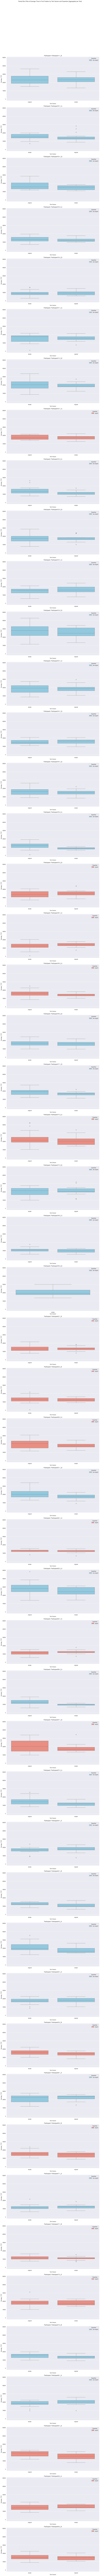

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def aggregate_time_to_first_fixation_with_expertise(word_df, ttf_column='Time_to_first_fixation'):
    """
    Aggregates word-level eyetracking data to calculate the average
    time to first fixation per text for each participant, text version,
    and expertise level.

    Args:
        word_df (pd.DataFrame): DataFrame with word-level eyetracking data.
        ttf_column (str): Name of the column containing time to first fixation.

    Returns:
        pd.DataFrame: DataFrame with average time to first fixation per
                      Participant_unique, Media, text.version, is.expert.
    """
    if ttf_column not in word_df.columns:
        raise ValueError(f"Time to first fixation column '{ttf_column}' not found.")
    if 'Participant_unique' not in word_df.columns:
        raise ValueError("Column 'Participant_unique' not found.")
    if 'Media' not in word_df.columns:
        raise ValueError("Column 'Media' not found.")
    if 'text.version' not in word_df.columns:
        raise ValueError("Column 'text.version' not found.")
    if 'is.expert' not in word_df.columns:
        raise ValueError("Column 'is.expert' not found.")

    aggregated_df = word_df.groupby(['Participant_unique', 'Media', 'text.version', 'is.expert'])[ttf_column].mean().reset_index()
    aggregated_df.rename(columns={ttf_column: 'Average_TTFF'}, inplace=True)
    return aggregated_df

def plot_paired_ttff_boxplots_by_expertise(aggregated_df, feature_column='Average_TTFF'):
    """
    Generates paired box plots to compare the average time to first fixation
    per text between 'simplified' and 'original' text versions, faceted by
    participant and colored by expertise level.

    Args:
        aggregated_df (pd.DataFrame): DataFrame with aggregated data per
                                       Participant_unique, Media, text.version, is.expert.
        feature_column (str): Name of the aggregated feature column to plot.
    """
    unique_participants = aggregated_df['Participant_unique'].unique()
    num_participants = len(unique_participants)

    fig, axes = plt.subplots(nrows=num_participants, ncols=1, figsize=(12, 6 * num_participants), sharey=True)
    if num_participants == 1:
        axes = [axes]

    for i, participant_id in enumerate(unique_participants):
        participant_data = aggregated_df[aggregated_df['Participant_unique'] == participant_id]

        if participant_data['Media'].nunique() > 0:
            sns.boxplot(x='text.version', y=feature_column, hue='is.expert', data=participant_data,
                        palette={'non-expert': 'skyblue', 'expert': 'salmon'}, ax=axes[i])
            axes[i].set_title(f'Participant: {participant_id}')
            axes[i].set_xlabel('Text Version')
            axes[i].set_ylabel(feature_column)
            axes[i].legend(title='Expertise')

    fig.suptitle(f'Paired Box Plots of Average Time to First Fixation by Text Version and Expertise (Aggregated per Text)', y=1.02)
    plt.tight_layout()
    plt.show()

def plot_paired_ttff_violinplots_by_expertise(aggregated_df, feature_column='Average_TTFF'):
    """
    Generates paired violin plots to compare the average time to first fixation
    per text between 'simplified' and 'original' text versions, faceted by
    participant and colored by expertise level.

    Args:
        aggregated_df (pd.DataFrame): DataFrame with aggregated data per
                                       Participant_unique, Media, text.version, is.expert.
        feature_column (str): Name of the aggregated feature column to plot.
    """
    unique_participants = aggregated_df['Participant_unique'].unique()
    num_participants = len(unique_participants)

    fig, axes = plt.subplots(nrows=num_participants, ncols=1, figsize=(12, 6 * num_participants), sharey=True)
    if num_participants == 1:
        axes = [axes]

    for i, participant_id in enumerate(unique_participants):
        participant_data = aggregated_df[aggregated_df['Participant_unique'] == participant_id]

        if participant_data['Media'].nunique() > 0:
            sns.violinplot(x='text.version', y=feature_column, hue='is.expert', data=participant_data,
                         palette={'non-expert': 'skyblue', 'expert': 'salmon'}, ax=axes[i])
            axes[i].set_title(f'Participant: {participant_id}')
            axes[i].set_xlabel('Text Version')
            axes[i].set_ylabel(feature_column)
            axes[i].legend(title='Expertise')

    fig.suptitle(f'Paired Violin Plots of Average Time to First Fixation by Text Version and Expertise (Aggregated per Text)', y=1.02)
    plt.tight_layout()
    plt.show()

# 1. Aggregate the data, including expertise
aggregated_ttff_expertise_df = aggregate_time_to_first_fixation_with_expertise(data, ttf_column='Time_to_first_fixation')

# 2. Now use the plotting functions that incorporate expertise
plot_paired_ttff_boxplots_by_expertise(aggregated_ttff_expertise_df, feature_column='Average_TTFF')
# plot_paired_ttff_violinplots_by_expertise(aggregated_ttff_expertise_df, feature_column='Average_TTFF')

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_aggregated_feature_faceted_boxplot(word_df, feature_column='Time_to_first_fixation'):
    """
    Aggregates word-level eyetracking data for a specified feature and
    generates faceted box plots to compare the average feature value per text
    between 'simple' and 'original' text versions, faceted by expertise level.

    Args:
        word_df (pd.DataFrame): DataFrame with word-level eyetracking data,
                                 including 'Participant_unique', 'Media',
                                 'text.version', 'is.expert', and the
                                 specified feature column.
        feature_column (str): Name of the column containing the eyetracking feature.
    """
    if feature_column not in word_df.columns:
        raise ValueError(f"Feature column '{feature_column}' not found.")
    if 'Participant_unique' not in word_df.columns:
        raise ValueError("Column 'Participant_unique' not found.")
    if 'Media' not in word_df.columns:
        raise ValueError("Column 'Media' not found.")
    if 'text.version' not in word_df.columns:
        raise ValueError("Column 'text.version' not found.")
    if 'is.expert' not in word_df.columns:
        raise ValueError("Column 'is.expert' not found.")

    aggregated_df = word_df.groupby(['Participant_unique', 'Media', 'text.version', 'is.expert'])[feature_column].mean().reset_index()
    aggregated_df.rename(columns={feature_column: f'Average_{feature_column}'}, inplace=True)
    aggregated_feature_column = f'Average_{feature_column}'

    unique_expertise = aggregated_df['is.expert'].unique()
    num_expertise = len(unique_expertise)

    fig, axes = plt.subplots(nrows=1, ncols=num_expertise, figsize=(10 * num_expertise, 6), sharey=True)
    if num_expertise == 1:
        axes = [axes]

    palette = {'simple': 'lightblue', 'original': 'lightcoral'}

    for i, expertise_level in enumerate(unique_expertise):
        expertise_data = aggregated_df[aggregated_df['is.expert'] == expertise_level]
        sns.boxplot(x='text.version', y=aggregated_feature_column, hue='text.version',
                    data=expertise_data, palette=palette,
                    showfliers=False, ax=axes[i])
        axes[i].set_title(f'Expertise: {expertise_level}')
        axes[i].set_xlabel('Text Version')
        axes[i].set_ylabel(aggregated_feature_column if i == 0 else '')
        # Removed: axes[i].legend().set_visible(False)

    fig.suptitle(f'Average {feature_column} by Text Version and Expertise', y=1.02)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Text Version', loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()

In [ ]:
for column in numerical_columns:
    plot_aggregated_feature_faceted_boxplot(data, feature_column=column)

In [ ]:
import pandas as pd

# Set paths to your dataframes
data = pd.read_csv("path", delimiter="\t", quoting=0, low_memory=False)

# plot